# Práctica 2: Ejercicio 1 - Preprocesamiento y análisis descriptivo de datos 

**Asignatura**: Machine Learning, 2025/2026

**Profesor**: José Tomás Palma Méndez

**Máster en Inteligencia Artificial**

**Autores:**  
- Jesús Guirado Pérez  
- Antonio Luis Sánchez Torres  
- Víctor Emilio Vicente García

# Resumen ejecutivo

En cuanto al preprocesamiento de datos, primero hablaré del dataset ``Datos_Energia``. Para este dataset, primero creamos un DatetimeIndex a partir de las columnas Año, Mes, Día y Hora. Una vez creado, eliminamos estas cuatro variables, quedándonos con siete variables. Tras esto, revisamos si existen fechas perdidas, que en este caso no hay. En cuanto al tratamiento de duplicados, al ser pocos, decidimos no modificarlos. Respecto a los valores nulos, los tratamos mediante interpolación temporal, ya que este método tiene en cuenta las fechas reales del índice temporal. La variable Día de la semana no se modifica en todo el análisis, ya que a simple vista puede verse que es una variable exógena.

En relación con el tratamiento de outliers, observamos que algunas variables presentan valores muy altos o muy bajos que desequilibran las series temporales, afectando a sus medias y desviaciones típicas. Además, existen valores negativos que no tienen sentido en este contexto, por lo que los consideramos outliers y los tratamos, mediante percentiles, como valores nulos para poder procesarlos posteriormente mediante interpolación temporal. No obstante, existe un pequeño matiz en las variables Electricidad (kW), Refrigeración (kW), Calefacción (kWh) y Energía total (kWh), ya que la variable objetivo, Energía total (kWh), es la suma de las otras tres. Por ello, decidimos que cada una de estas variables calcule primero sus valores nulos a partir de las otras tres, en caso de que tenga nulos y las demás no, excepto Energía total (kWh). Los nulos restantes se tratan posteriormente mediante interpolación temporal. En el caso de Energía total (kWh), todos sus nulos se tratan utilizando las otras tres variables, ya que estas ya no contienen ni outliers ni valores nulos.

Finalmente, analizamos la varianza, la correlación de cada variable con la variable objetivo y la matriz de correlación. En este caso no eliminamos ninguna variable, ya que el dataset contiene pocas variables y no queríamos limitar el análisis, pese al riesgo de multicolinealidad. Después, pasamos el dataset de frecuencia horaria a frecuencia diaria, aplicando la suma a todas las variables, excepto Día de la semana, que además de la suma dividimos entre 24 y lo pasamos a entero. Para finalizar, declaramos como variables endógenas a Electricidad (kW), Fotovoltaica (kW), Refrigeración (kW), Calefacción (kWh) y Emisión (kg CO₂), ya que influyen directamente en la variable objetivo, dejando como variable exógena Día de la semana. Guardamos el dataset con el nombre ``energia_preprocesada`` para poder ser utilizado en los siguientes ejercicios.

En cuanto al dataset ``Datos_Climaticos``, seguimos unos pasos muy similares. Primero creamos el DatetimeIndex a partir de las variables Año, Mes, Día y Hora. Eliminamos estas cuatro variables, quedándonos con diez variables, de las cuales Día de la semana la tratamos igualmente como variable exógena. En cuanto a los duplicados, al ser tan pocos decidimos no modificarlos, ya que, de 78.888 datos, que existan duplicados no es algo extraño. El tratamiento de nulos se realiza mediante interpolación temporal para las variables numéricas, y para las variables object utilizamos primero ffill, rellenando los nulos con el valor anterior, y posteriormente bfill en caso de que existan más nulos consecutivos, rellenándolos con el valor posterior. A continuación, tratamos los outliers de las variables Temperatura (°C) y Presión (hPa) a través de percentiles, transformándolos en valores nulos para posteriormente aplicar interpolación temporal.

Después, transformamos las variables object, Dirección del viento y Condición meteorológica, en variables booleanas mediante dummies, eliminando la primera columna de cada una de ellas. A continuación, unimos el dataset de energía ya preprocesado anteriormente (antes de pasarlo a frecuencia diaria) con el preprocesado del dataset climático, eliminando la variable Día de la semana, lo que nos deja con 47 variables. A partir de aquí, analizamos la varianza, observando que existen 34 variables con valores próximos a cero, las cuales eliminamos, ya que realmente no aportan información relevante a los modelos, quedándonos finalmente con 13 variables. Al analizar la correlación con la variable objetivo no eliminamos ninguna variable, pero al estudiar la matriz de correlación eliminamos Emisión (kg CO₂), ya que, con 13 variables, podemos prescindir de ella y así reducir el riesgo de multicolinealidad, haciéndonos quedar al final con 12 variables.

Posteriormente, transformamos los datos de frecuencia horaria a diaria, aplicando la suma a Día de la semana y al resto de variables de consumo, la media a las variables climáticas y el máximo a la variable Ráfaga de viento (m/s). Declaramos como variables endógenas: Electricidad (kW), Fotovoltaica (kW), Refrigeración (kW), Calefacción (kWh), Temperatura (°C), Punto de rocío (°C), Humedad (%) y Presión (hPa); y como variables exógenas: Día de la semana, Velocidad del viento (m/s) y Ráfaga de viento (m/s). Por último, guardamos los datos preprocesados de energía y clima en un único dataset llamado ``energia_climaticos_preprocesada``.

En cuanto al análisis descriptivo, observamos que todas las variables analizadas en los datasets ``energia_preprocesada`` y ``energia_climaticos_preprocesada``, excepto Día de la semana, ya que esta última no la analizamos, presentan estacionalidad anual, por lo que es esperable que estos patrones se repitan en el futuro. Además, Energía total (kWh) presenta también estacionalidad semanal. Las variables son estacionarias, por lo que la media y la varianza se mantienen constantes y la estructura temporal no cambia, haciendo innecesaria la aplicación de transformaciones adicionales. Ninguna variable sigue una distribución normal. Todas las variables endógenas presentan una alta autocorrelación con lag = 7, lo que indica una fuerte dependencia entre valores presentes y pasados. La tendencia, el ruido y los boxplots varían en función de cada variable.

# Análisis descriptivo de datos y preprocesamiento

## Librerias

Primero, cargamos las librerías que utilizaremos a lo largo del ejercicio.

In [197]:
# Procesamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

## Lectura de datasets

Cargamos los datasets con los que trabajaremos en la práctica, ``Datos_Energia.csv`` y ``Datos_Climaticos.csv``

In [198]:
# Cargamos nuestros dos datasets
energia = pd.read_csv("Data/Datos_Energia.csv")
climaticos = pd.read_csv("Data/Datos_Climaticos.csv")

El dataframe energia contendrá el dataset ``Datos_Energia.csv`` y el dataframe climáticos, el dataset ``Datos_Climaticos.csv``

## Análisis superficial de los datasets

Procedemos ahora a hacer un primer análisis los dos datasets que trataremos en la práctica.

Observamos primero el dataset con los datos sobre el consumo de energía.

In [199]:
# Información del dataset
energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78888 entries, 0 to 78887
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  78888 non-null  int64  
 1   Mes                  78888 non-null  int64  
 2   Día                  78888 non-null  int64  
 3   Hora                 78888 non-null  int64  
 4   Día de la semana     78888 non-null  int64  
 5   Electricidad (kW)    78871 non-null  float64
 6   Fotovoltaica (kW)    78871 non-null  float64
 7   Refrigeración (kW)   78871 non-null  float64
 8   Calefacción (kWh)    78871 non-null  float64
 9   Energía total (kWh)  78871 non-null  float64
 10  Emisión (kg CO₂)     78871 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 6.6 MB


Aquí podemos ver que el primer dataset tiene 11 variables, de las cuales, las 4 primeras variables contienen datos que podemos utilizar para crear el índice temporal ("DatetimeIndex") para el mismo. También podemos ver que hay 78888 entradas. Además, todas las variables son numéricas, por lo que no hará falta realizar convertir ninguna en dummy o usar codificación one-hot. Por último, podemos ver que deberemos hacer también un tratamiento de valores perdidos (*missing*), ya que hay 6 columnas (Electricidad (kW), Fotovoltaica (kW), Refrigeración (kW), Calefacción (kWh), Energía total (kWh) y Emisión (kg CO₂)) con 17 valores nulos.

Procedemos ahora a observar el dataset con los datos climáticos.

In [200]:
# Información del dataset
climaticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78888 entries, 0 to 78887
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Año                         78888 non-null  int64  
 1   Mes                         78888 non-null  int64  
 2   Día                         78888 non-null  int64  
 3   Hora                        78888 non-null  int64  
 4   Día de la semana            78888 non-null  int64  
 5   Temperatura (°C)            78701 non-null  float64
 6   Punto de rocío (°C)         78701 non-null  float64
 7   Humedad (%)                 78701 non-null  float64
 8   Dirección del viento        78355 non-null  object 
 9   Velocidad del viento (m/s)  78701 non-null  float64
 10  Ráfaga de viento (m/s)      78701 non-null  float64
 11  Presión (hPa)               78701 non-null  float64
 12  Precipitación (mm)          78701 non-null  float64
 13  Condición meteorológica     786

En este dataset podemos ver que tenemos 14 variables, de las cuales, las 4 primeras columnas se utilizarán para realizar un índice temporal ( *"DatetimeIndex"*) para el mismo. Podemos ver cómo también tenemos 78888 datos, donde tenemos 2 variables "object", (**Dirección del viento** y **Condición meteorológica**), que trataremos con variables dummies. Por último, todas las variables excepto las 5 primeras contienen valores nulos, por lo que también tendremos que tratarlos en este dataset.

## Creación del índice temporal

Vamos a crear nuestro índice temporal (*DatetimeIndex*) que nos será necesario para nuestra práctica de series temporales.

Lo haremos siguiendo la estructura de "Año-Mes-Dia Hora:Minuto:Segundo". Para ello, procesaremos las variables Año, Mes, Dia y Hora como strings siguiendo la estructura de antes, además de añadir al final por nosotros mismos los minutos y segundos como ":00:00".

Luego, procedemos a eliminar estas variables, ya que no nos serán necesarias una vez que creamos nuestro índice.

In [201]:
# Creamos un datetime con el año, mes, dia y hora (minutos y segundos lo ponemos a 00 los dos)
energia.index = pd.to_datetime(energia['Año'].astype(str) + '-' + energia['Mes'].astype(str) + '-' + energia['Día'].astype(str) + ' ' + energia['Hora'].astype(str) + ':00:00')
climaticos.index = pd.to_datetime(climaticos['Año'].astype(str) + '-' + climaticos['Mes'].astype(str) + '-' + climaticos['Día'].astype(str) + ' ' + climaticos['Hora'].astype(str) + ':00:00')

# Eliminamos las columnas que hemos utilizado para crear el datetime
energia = energia.drop(columns=['Año', 'Mes', 'Día', 'Hora'])
climaticos = climaticos.drop(columns=['Año', 'Mes', 'Día', 'Hora'])

Comprobamos que, efectivamente, hemos hecho el índice de forma correcta y que hemos eliminado las variables.

In [202]:
# Información del dataset
energia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78888 entries, 2014-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Día de la semana     78888 non-null  int64  
 1   Electricidad (kW)    78871 non-null  float64
 2   Fotovoltaica (kW)    78871 non-null  float64
 3   Refrigeración (kW)   78871 non-null  float64
 4   Calefacción (kWh)    78871 non-null  float64
 5   Energía total (kWh)  78871 non-null  float64
 6   Emisión (kg CO₂)     78871 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 4.8 MB


Vemos que el dataset de energía, con 7 variables en total, ya no tiene esas 4 variables que hemos utilizado para crear el *DatetimeIndex*. Este tiene 78888 entradas, de la fecha 2014-01-01 00:00:00 a la fecha 2022-12-31 23:00:00. Debemos tener en cuenta que las variables **Electricidad (kW), Fotovoltaica (kW), Refrigeración (kW), Calefacción (kWh), Energía total (kWh) y Emisión (kg CO₂)** tienen 17 nulos cada una.

In [203]:
# Información del dataset
climaticos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78888 entries, 2014-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Día de la semana            78888 non-null  int64  
 1   Temperatura (°C)            78701 non-null  float64
 2   Punto de rocío (°C)         78701 non-null  float64
 3   Humedad (%)                 78701 non-null  float64
 4   Dirección del viento        78355 non-null  object 
 5   Velocidad del viento (m/s)  78701 non-null  float64
 6   Ráfaga de viento (m/s)      78701 non-null  float64
 7   Presión (hPa)               78701 non-null  float64
 8   Precipitación (mm)          78701 non-null  float64
 9   Condición meteorológica     78695 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 6.6+ MB


Como resultado, en el dataset de climáticos podemos ver cómo nos hemos quedado con 10 variables, habiendo eliminado las primeras 4 variables que hemos utilizado para crear el *DatetimeIndex*. Este tiene 78888 entradas, de la fecha 2014-01-01 00:00:00 a la fecha 2022-12-31 23:00:00. Debemos tener en cuenta que las variables **Temperatura (°C), Punto de rocío (°C), Humedad (%), Velocidad del viento (m/s), Ráfaga de viento (m/s), Presión (hPa) y Precipitación (mm)** tienen 187 nulos cada una. Por su parte,  **Condición meteorológica tiene 193 nulos y Dirección del viento, 533** nulos.

Por lo tanto, ya tenemos nuestros dos datasets con sus índices temporales (*DatetimeIndex*) de frecuencia horaria.

## Datos de Energía

Una vez hecho un análisis general de los datasets, además de crear su índice temporal, ahora vamos a centrarnos en el dataset de ``Datos_Energia.csv``.

### Fechas perdidas

Comprobamos si tenemos fechas perdidas. Lo haremos comprobando la frecuencia horaria, que es como manipularemos el dataset de momento.

In [204]:
# Se calcula el numero de fechas desde a través de las hora
fechas_esperadas =  pd.date_range(start=energia.index.min(), end=energia.index.max(), freq='h')
# Diferencias entre la cantidad de horas que se supone que tenemos, y lo que realmente tenemos
fechas_perdidas = fechas_esperadas.difference(energia.index)
# Imprimimos el número de horas perdidas
print(f'Número de fechas faltantes: {len(fechas_perdidas)}')
# Mostramos las horas pérdidas
fechas_perdidas

Número de fechas faltantes: 0


DatetimeIndex([], dtype='datetime64[ns]', freq='h')

Vemos como no tenemos fechas perdidas, por lo que están colocadas todas las horas de cada día en el índice.

### Tratamiento de duplicados

Ahora analizaremos si tenemos valores duplicados en nuestro conjunto de datos.

In [205]:
# Visualizamos la cantidad de duplicados del dataset
energia.duplicated().sum()


np.int64(63)

Observamos que tenemos 63 valores duplicados, pero decidimos no eliminarlos porque, del total de 78888 valores que contiene nuestro dataset, consideramos que es factible que puedan existir valores duplicados a lo largo de todas las horas de todos los años incluidos. Por tanto, consideramos que no son valores erróneos y no los eliminamos.

In [206]:
energia.index.duplicated().sum()

np.int64(0)

Vemos como no tenemos índices duplicados, por lo que no tenemos dos días con índices repetidos.

### Tratamiento de nulos

Vamos a comprobar los nulos que tenemos ahora que hemos tratado los duplicados con nulos.

In [207]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia.isna().sum()

Día de la semana        0
Electricidad (kW)      17
Fotovoltaica (kW)      17
Refrigeración (kW)     17
Calefacción (kWh)      17
Energía total (kWh)    17
Emisión (kg CO₂)       17
dtype: int64

Como se puede ver hay pocos nulos (17), por lo que podríamos eliminarlos o imputarlos, en nuestro caso, como no queremos eliminar ya que no queremos perder datos, decidimos imputar.

#### Imputación mediante interpolación temporal

En nuestro dataset, nuestros datos están organizados por horas, por lo que pensamos sacar ventaja sobre ello. Por lo tanto, "method = time" utiliza el DatetimeIndex para estimar los valores faltantes teniendo en cuenta la distancia real entre timestamps (en este caso, horas). Viendo la documentación, vemos que funciona en datos diarios o con mayor resolución, por lo que es adecuado para series horarias como esta. Además, al haber pocos valores nulos, la interpolación temporal proporciona una aproximación suave y coherente sin distorsionar el comportamiento general de la serie.

In [208]:
# # Seleccionamos todas las columnas numéricas del dataset
# numericas = energia.select_dtypes(include='number').columns
# # Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
# energia[numericas] = energia[numericas].interpolate(method='time')

Comprobamos si siguen existiendo más nulos.

In [209]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia.isna().sum()

Día de la semana        0
Electricidad (kW)      17
Fotovoltaica (kW)      17
Refrigeración (kW)     17
Calefacción (kWh)      17
Energía total (kWh)    17
Emisión (kg CO₂)       17
dtype: int64

Podemos ver como ya no existen más nulos y la interpolación temporal ha sido realizada con éxito.

### Tratamiento de outliers y valores nulos

Vemos primero la cantidad de valores nulos en cada una de las variables.

In [210]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia.isna().sum()

Día de la semana        0
Electricidad (kW)      17
Fotovoltaica (kW)      17
Refrigeración (kW)     17
Calefacción (kWh)      17
Energía total (kWh)    17
Emisión (kg CO₂)       17
dtype: int64

Vamos a analizar si hay valores sospechosos en cada una de las variables. Primero, analizaremos los 5 primeros datos de nuestro dataset.

In [211]:
# Visualizamos las 5 primeras columnas del dataset
energia.head()

,Día de la semana,Electricidad (kW),Fotovoltaica (kW),Refrigeración (kW),Calefacción (kWh),Energía total (kWh),Emisión (kg CO₂)
2014-01-01 00:00:00,2,21294.33,2.39,8098.10352,876.28229,30268.37288,18880.0
2014-01-01 01:00:00,2,21190.46,1.95,7312.22987,873.35158,29377.43704,18320.0
2014-01-01 02:00:00,2,21537.07,4.29,7305.86410,911.45081,29752.56792,18560.0
2014-01-01 03:00:00,2,21688.66,9.65,7573.82433,870.42087,30130.62951,18790.0
2014-01-01 04:00:00,2,23044.40,10.19,7462.96849,946.61933,31455.31043,19620.0


De momento, en las 5 primeras filas no vemos nada raro. Vamos a revisar en más profundidad haciendo un análisis visual de las series temporales.

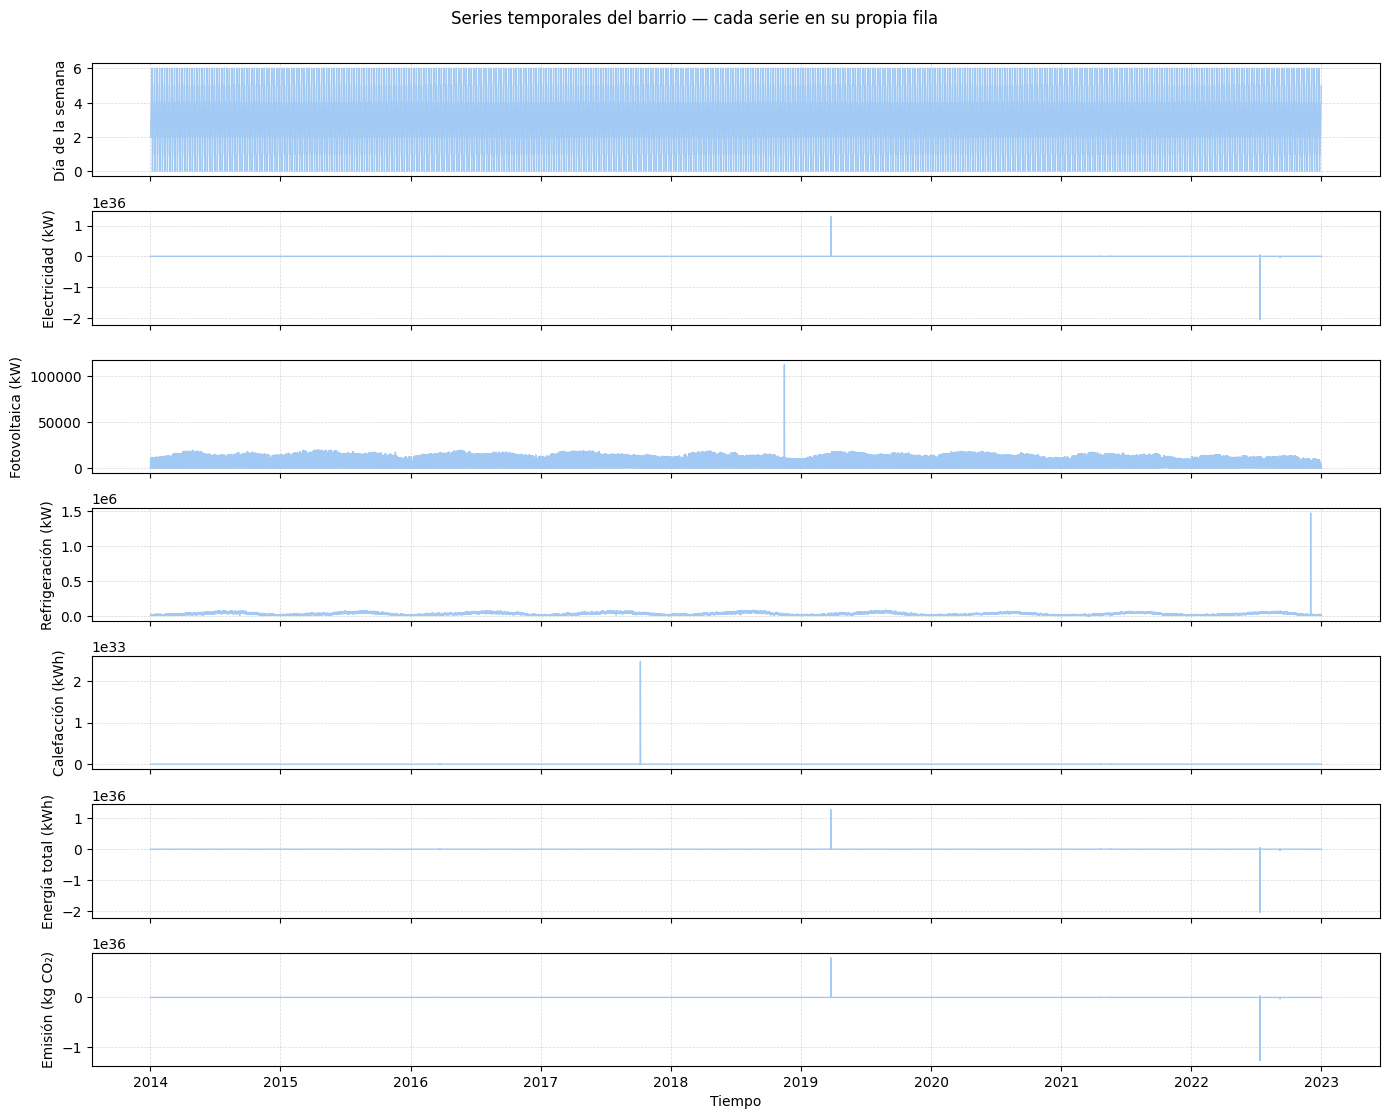

In [212]:
# Guarda el número de variables del dataset
n = len(energia.columns)
# Creamos las figuras y ejes con 1 columna que cada fila tendrá una variable, en figsize poniendo anchura y altura, comparten el mismo eje x
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(14, max(2, 1.6 * n)), sharex=True)
# Dibuja la serie temporal de cada columna, pone su nombre al eje y y coloca un grid
for ax, col in zip(axes, energia.columns):
    ax.plot(energia.index, energia[col], linewidth=1)
    ax.set_ylabel(col)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Coloca en la última gráfica el eje X
axes[-1].set_xlabel("Tiempo")
# Nombre general
fig.suptitle("Series temporales del barrio — cada serie en su propia fila", y=0.995)
# Distancia entre filas
plt.tight_layout(rect=[0, 0, 1, 0.99])
# Se muestra la gráfica
plt.show()


Intentamos analizar lo que vemos a simple vista. Hablaremos de muchos valores como estimación y no como número exacto, pero suficiente para entender como funciona cada variable:

* **Día de la semana**: Esta variable simplemente indica el número del día de la semana en que nos encontramos, por eso la gráfica muestra esta forma periódica. Será nuestra variable exógena, por lo que no trataremos con ella y no la eliminaremos del dataset.

* **Electricidad (kW)**: Se puede ver que tiene una escala de 1e36. Al estar todos los valores en 0, la gráfica da a entender que hay una desproporción entre los datos y los outliers, ya que todos los valores están alrededor de 0 y unos pocos a 1e36, y otros a -2e36.

* **Fotovoltaica (kW)**: Casi todos los datos están entre 0 y 25000, mientras que algunos datos suben disparados a 100000, indicando presencia de outliers.

* **Refrigeración (kW)**: Sucede como en la variable Electricidad (kW): todos los datos se encuentra alrededor de 0, y algunos datos cerca de 1.5e36, por lo que estos outliers están desproporcionadamente por encima de los datos de la variable.

* **Calefacción (kWh)**: Casi todos los datos están alrededor de 0 y algunos a 2e33, pudiéndose ver de nuevo, outliers exageradamente desproporcionadamente grandes.

* **Energía total (kWh)**: Al ser la suma total de Electricidad (kW), Refrigeración (kWh) y Calefacción (kWh), y estas 3 tienen outliers, esta variable también tendrá outliers, y como puede verse en la gráfica, se ven iguales que Electricidad (kW), seguramente debido a que la escala de outliers es la más grande con 1e36 y -2e36.

* **Emisión (kg CO₂)**: Se puede ver que se parece bastante a "Energía total (kWh)", lo que tiene sentido según el contexto de la variable con el dataset, por lo que nos indica que puede haber una correlación muy alta con la variable objetivo.

Ahora vamos a analizar las variables de una en una, excepto los días de la semana, que como hemos visto, es exógena. **Sustituiremos los valores atípicos que encontremos por valores nulos.**

#### Electricidad (kW)

Al principio de todo, tratamos los valores nulos a partir de las otras 3 variables de las que depende. Para ello, las otras 3 columnas deberán estar presentes en aquella fila en la que esté el valor nulo localizado. 

In [213]:
# Serie booleana que irá guardando a True que sean nulos la fila que queremos y no nulos las otras columnas en esa misma fila, con cada uno de los nulos
mask = (
    energia['Electricidad (kW)'].isna() &
    energia[['Refrigeración (kW)', 'Calefacción (kWh)', 'Energía total (kWh)']].notna().all(axis=1)
)

# Rellena los valores donde mask era igual a true
energia.loc[mask, 'Electricidad (kW)'] = (
    energia.loc[mask, 'Energía total (kWh)'] -
    energia.loc[mask, 'Refrigeración (kW)'] -
    energia.loc[mask, 'Calefacción (kWh)']
)

Vamos a revisar como están distribuidos sus valores.

In [214]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia['Electricidad (kW)'].describe())


count    7.887100e+04
mean    -3.530612e+31
std      1.127846e+34
min     -2.050000e+36
25%      2.168270e+04
50%      2.515137e+04
75%      2.915756e+04
max      1.290000e+36
Name: Electricidad (kW), dtype: float64


Podemos ver como hay datos con valores excesivamente altos y bajos que no tienen sentido en la variable, por lo tanto establecemos percentiles para solamente eliminar los datos excesivos. Establecemos como límites los percentiles 0.3 y 99.9 %.

In [215]:
# establecemos los percentiles
cuartil_minimo = energia['Electricidad (kW)'].quantile(0.003)
cuartil_maximo = energia['Electricidad (kW)'].quantile(0.999)

# Conservamos únicamente los datos en los cuales hemos establecido los límites
energia['Electricidad (kW)'] = energia['Electricidad (kW)'].where(
    (energia['Electricidad (kW)'] >= cuartil_minimo) & (energia['Electricidad (kW)'] <= cuartil_maximo)
)


Ajustamos para intentar eliminar valores excesivos y otros valores que bajen o suban y que no tengan sentido. Comprobamos cuántos valores hemos eliminado.

In [216]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia.isna().sum()

Día de la semana         0
Electricidad (kW)      333
Fotovoltaica (kW)       17
Refrigeración (kW)      17
Calefacción (kWh)       17
Energía total (kWh)     17
Emisión (kg CO₂)        17
dtype: int64

Si no contamos los anteriores 17 valores missing, hemos eliminado 316 valores, los cuáles constituye un ~0.4% del dataset, lo que debería ser una pequeña cantidad para eliminar.

Utilizamos el método que hemos decidido antes usar con los valores nulos: el interpolado temporal, haciendo que queden valores más lógicos.

Vamos a ver como hace la sustitución en una de las zonas con nulos, para ver cómo funciona la imputación por interpolación temporal. Para ello, graficamos uno de los huecos más grandes que hemos encontrado con valores *missing*.

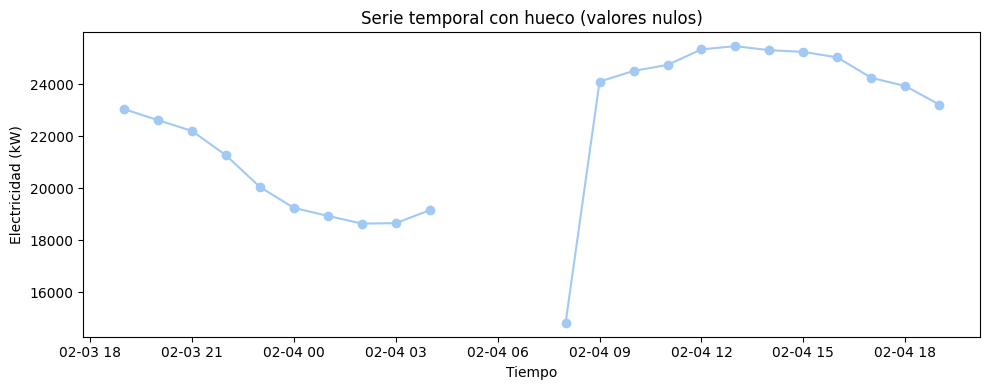

In [217]:
# Se guarda una copia del dataset original
energia_original = energia.copy()

# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
energia['Electricidad (kW)'] = energia['Electricidad (kW)'].interpolate(method='time')

# Guardamos la columna utilizada para el interpolado temporal
col = 'Electricidad (kW)'

# Guarda los índices donde hayan NaN de la columna seleccionada
idx_nan = energia_original[col][energia_original[col].isna()].index

# Elige el primer hueco
t0 = idx_nan[2]

# Zoom a la zona donde está el hueco, 12 horas antes y 12 horas después
inicio = t0 - pd.Timedelta(hours=12)
fin    = t0 + pd.Timedelta(hours=12)

# Subconjunto de la serie temporal, con la original y la que aplicamos la interpolación, en las zonas calculadas anteriormente, en la columna seleccionada
orig_zoom = energia_original.loc[inicio:fin, col]
interp_zoom = energia.loc[inicio:fin, col]

# Se guarda una serie booleana con los nulos del subconjunto original
mask = orig_zoom.isna()

# Se crea una gráfica tamaño (10, 4)
plt.figure(figsize=(10,4))
# Se utilizará el índice de tiempo en el eje x y los valores originales de la variable en el eje y, marcándolos con círculos
plt.plot(orig_zoom.index, orig_zoom, marker='o')
plt.title('Serie temporal con hueco (valores nulos)')
plt.xlabel('Tiempo')
plt.ylabel(col)
plt.tight_layout()
plt.show()



Aquí podemos ver que los puntos indican los valores exactos de la variable, y las líneas de la función sirven como ayudas visuales. Como se puede ver, hay un hueco entre las 3 y las 9 de ese día. Ese hueco son los NaN que trataremos de rellenar con nuestra interpolación temporal. Para ver cómo se comporta, haremos otra gráfica.

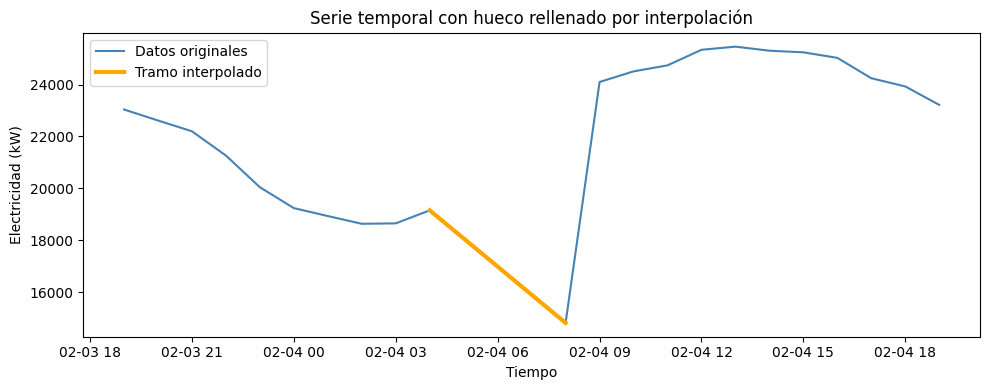

In [218]:
# Copia el subconjunto que vamos a utilizar como interpolado
serie_azul = interp_zoom.copy()

# En el hueco interpolado, ponemos NaN para que no se dibuje azul
serie_azul[mask] = float('nan')

# Se crea una gráfica de tamaño (10, 4)
plt.figure(figsize=(10,4))

# Se pintará en azul los datos originales, sin pintar el corte, con el indice de tiempo como eje x y los valores en el eje y
plt.plot(
    serie_azul.index,
    serie_azul,
    color='steelblue',
    label='Datos originales'
)

# Se pintará en naranja en todas las zonas que han sido seleccionadas como nulas
idx_interp = interp_zoom.index[mask]

# Se añade un punto antes y después para continuidad visual
idx_ext = interp_zoom.index[
    interp_zoom.index.get_loc(idx_interp[0]) - 1 :
    interp_zoom.index.get_loc(idx_interp[-1]) + 2
]

# Se pinta en la gráfica de color naranja la zona cortada
plt.plot(
    idx_ext,
    interp_zoom.loc[idx_ext],
    color='orange',
    linewidth=3,
    label='Tramo interpolado'
)

# Se imprime la serie temporal
plt.title('Serie temporal con hueco rellenado por interpolación')
plt.xlabel('Tiempo')
plt.ylabel(col)
plt.legend()
plt.tight_layout()
plt.show()



En esta segunda gráfica, vemos cómo el código anterior ha ocupado los huecos de los datos faltantes. Vemos cómo el interpolado temporal se comporta como una interpolación lineal tal y como ya dijimos. Vemos que se produce un relleno de datos bastante aceptable al usar este método, por lo que lo usaremos también para el resto de series.

Aquí podemos ver cómo han quedado los datos después del interpolado temporal.

In [219]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
energia['Electricidad (kW)'].describe()

count    78888.000000
mean     25705.182745
std       5426.466777
min      14614.250000
25%      21681.755000
50%      25145.835000
75%      29146.885000
max      43837.690000
Name: Electricidad (kW), dtype: float64

Se puede ver un mínimo de 14614.25, un máximo de 43837.69, una mediana de 25145.835 y una desviación típica de 5426.

Ahora vamos a analizar la gráfica.

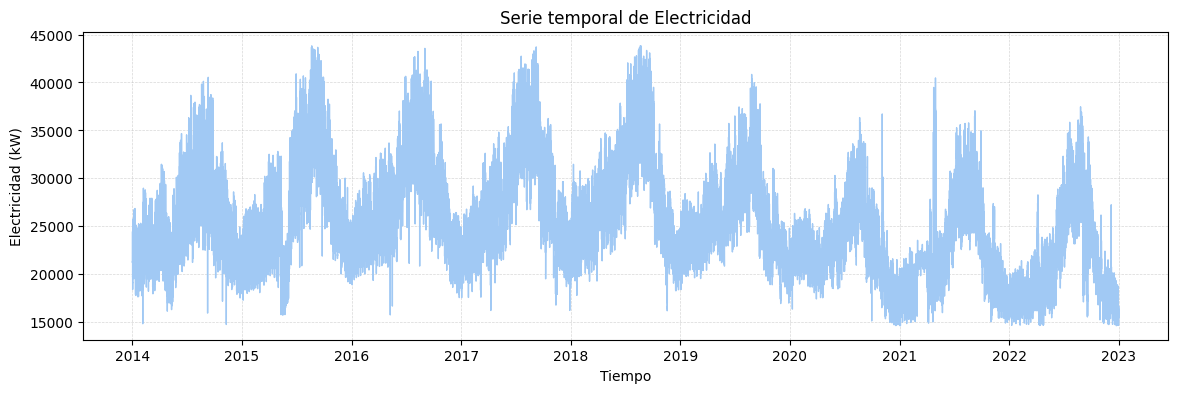

In [220]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia.index, energia['Electricidad (kW)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Electricidad (kW)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Electricidad')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Vemos cómo los valores parecen ir desde alrededor de 14000 a alrededor de 43000, valores que parecen más típicos para el contexto del problema. Además, ahora podemos ver correctamente la representación de la gráfica, sin valores "aplastados".

Por último, para confirmar que no quedan datos atípicos que resulten exagerados, ahora vamos a analizar los boxplot de la variable.

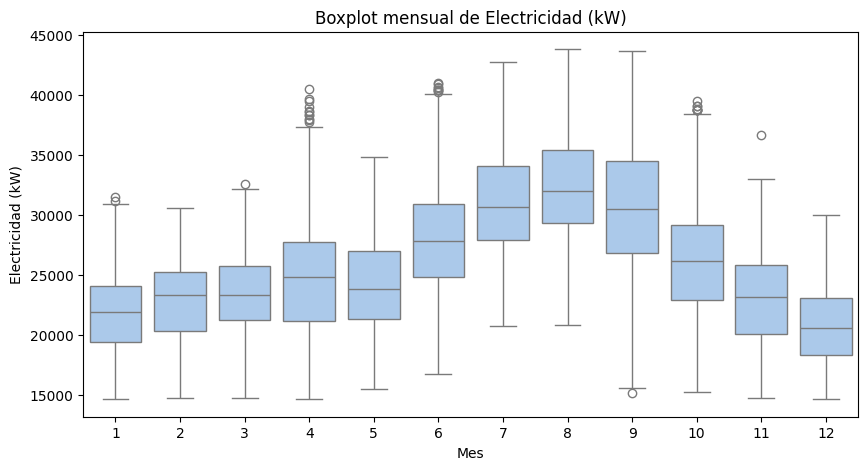

In [221]:
# Se crera una figura (10, 5)
plt.figure(figsize=(10, 5))

# Boxplot con el eje X los meses, e y la columna que queremos analizar
sns.boxplot(x=energia.index.month, y='Electricidad (kW)', data=energia)

# Creamos la gráfica
plt.xlabel('Mes')
plt.ylabel('Electricidad (kW)')
plt.title('Boxplot mensual de Electricidad (kW)')
plt.show()

Podemos ver que aunque existen outliers son muy ligeros, y por lo tanto, no los tratamos. Debemos recordar que, el método intercuartílico para *outliers* (valores atípicos), identifica puntos de datos inusualmente altos o bajos usando el Rango Intercuartílico (IQR), calculando los límites inferior como \(Q1-1.5 x IQR\) y superior como \(Q3+1.5 x IQR\), donde \(Q1\) y \(Q3\) son los cuartiles 1 y 3, respectivamente, y cualquier dato fuera de estos límites se considera un outlier. **En vista del boxplot, los valores que aparecen dibujados como atípicos no parecen alejarse demasiado del rango intercuartílico, por lo que consideramos que pueden tratarse de valores altos que son algo excepcionales, pero que pueden ser normales. Por esto, decidimos no eliminarlos. Sólo quitaremos los *hard outliers*** 

Además, podemos ver como aumenta el consumo de electricidad en meses de verano, como sucedía con energía total.

#### Fotovoltaica (kW)

Vamos a analizar la variable Fotovoltaica (kW)

In [222]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia['Fotovoltaica (kW)'].describe())

count     78871.000000
mean       3968.465261
std        5310.401284
min           0.000000
25%           3.870000
50%         159.940000
75%        8394.125000
max      111938.620000
Name: Fotovoltaica (kW), dtype: float64


Se puede ver, cómo el mínimo es de 0, el valor del primer cuartil de 3.87, la mediana de 159.94, el valor del tercer cuartil de 8394.125 y el máximo de 111938.62. Por lo que se ve, y por lo que hemos visto en la gráfica, hay outliers muy altos que debemos eliminar. Para ello utilizaremos el mismo proceso que la anterior variable pero sin tener en cuenta el percentil inferior.

In [223]:
# establecemos los percentiles
cuartil_maximo = energia['Fotovoltaica (kW)'].quantile(0.9999)

# Conservamos únicamente los datos en los cuales hemos establecido los límites
energia['Fotovoltaica (kW)'] = energia['Fotovoltaica (kW)'].where((energia['Fotovoltaica (kW)'] <= cuartil_maximo)
)


Una vez eliminado únicamente los outliers, revisamos cuántos outliers hemos eliminado.

In [224]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia.isna().sum()

Día de la semana        0
Electricidad (kW)       0
Fotovoltaica (kW)      25
Refrigeración (kW)     17
Calefacción (kWh)      17
Energía total (kWh)    17
Emisión (kg CO₂)       17
dtype: int64

Si no contamos los 17 nulos ya presentes, hemos eliminado 8 outliers. Ahora vamos a hacer un interpolado temporal para rellenar nulos siguiendo la distribución de la gráfica.

In [225]:
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
energia['Fotovoltaica (kW)'] = energia['Fotovoltaica (kW)'].interpolate(method='time')

Revisamos cómo han quedado los datos despés del interpolado temporal.

In [226]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia['Fotovoltaica (kW)'].describe())

count    78888.000000
mean      3965.668666
std       5291.384048
min          0.000000
25%          3.870000
50%        160.065000
75%       8392.707500
max      19031.330000
Name: Fotovoltaica (kW), dtype: float64


Vemos como ya no queda nulos, y la variable parece tener valores más normales, entre 0 y 19031.33, ahora vamos a revisarlo con una gráfica.

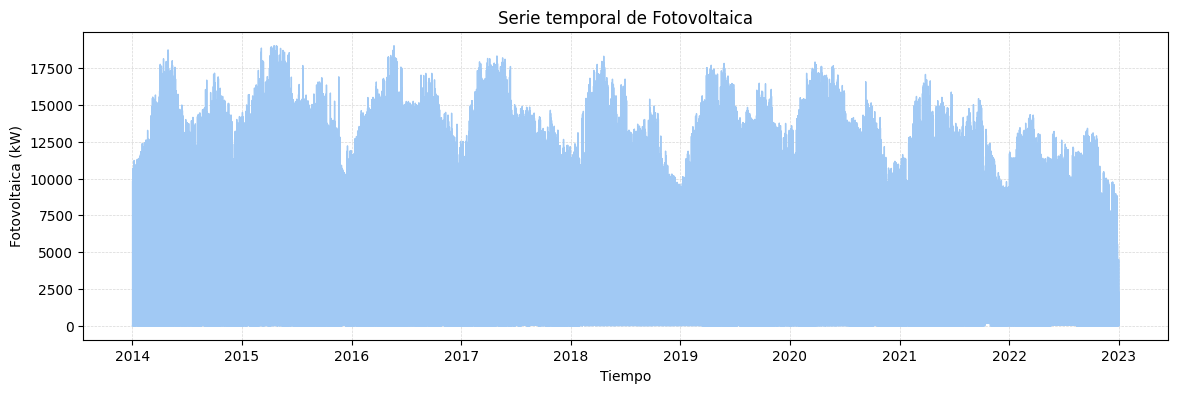

In [227]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia.index, energia['Fotovoltaica (kW)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Fotovoltaica (kW)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Fotovoltaica')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()

Se puede ver cómo podemos ver correctamente la gráfica que habíamos visto al principio pero sin los outliers, por lo tanto se ve que todos los outliers han sido eliminados de forma definitiva.

Ahora vamos a analizar los boxplot de la variable.

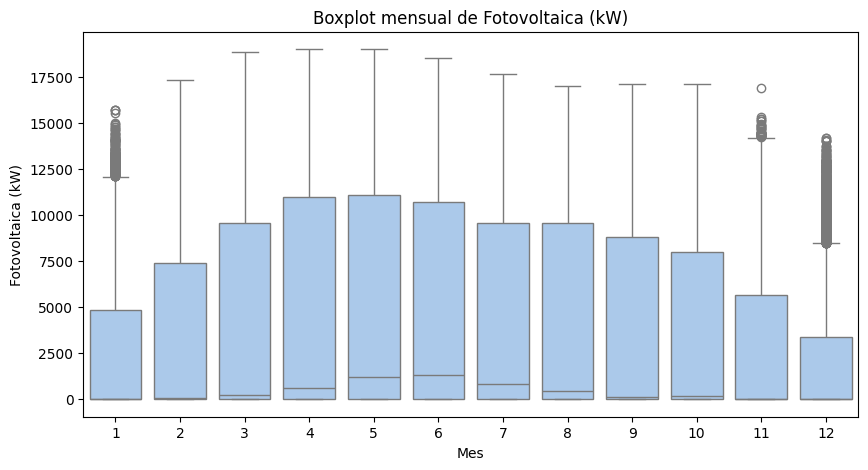

In [228]:
# Se crera una figura (10, 5)
plt.figure(figsize=(10, 5))

# Boxplot con el eje X los meses, e y la columna que queremos analizar
sns.boxplot(x=energia.index.month, y='Fotovoltaica (kW)', data=energia)

# Creamos la gráfica
plt.xlabel('Mes')
plt.ylabel('Fotovoltaica (kW)')
plt.title('Boxplot mensual de Fotovoltaica (kW)')
plt.show()

Podemos ver que aunque existen outliers son muy ligeros, y por lo tanto, no los tratamos. Debemos recordar que, el método intercuartílico para *outliers* (valores atípicos), identifica puntos de datos inusualmente altos o bajos usando el Rango Intercuartílico (IQR), calculando los límites inferior como \(Q1-1.5 x IQR\) y superior como \(Q3+1.5 x IQR\), donde \(Q1\) y \(Q3\) son los cuartiles 1 y 3, respectivamente, y cualquier dato fuera de estos límites se considera un outlier. **En vista del boxplot, los valores que aparecen dibujados como atípicos no parecen alejarse demasiado del rango intercuartílico, por lo que consideramos que pueden tratarse de valores altos que son algo excepcionales, pero que pueden ser normales. Por esto, decidimos no eliminarlos. Sólo quitaremos los *hard outliers*** 

Además, podemos ver como la generación de energía fotovoltaica es mayor en los meses de marzo, abril y mayo.

#### Refrigeración (kW)

Al principio de todo, tratamos los valores nulos a partir de las otras 3 variables de las que depende. Para ello, las otras 3 columnas deberán estar presentes en aquella fila en la que esté el valor nulo localizado. 

In [229]:
# Serie booleana que irá guardando a True que sean nulos la fila que queremos y no nulos las otras columnas en esa misma fila, con cada uno de los nulos
mask = (
    energia['Refrigeración (kW)'].isna() &
    energia[['Electricidad (kW)', 'Calefacción (kWh)', 'Energía total (kWh)']].notna().all(axis=1)
)
# Rellena los valores donde mask era igual a true
energia.loc[mask, 'Refrigeración (kW)'] = (
    energia.loc[mask, 'Energía total (kWh)'] -
    energia.loc[mask, 'Electricidad (kW)'] -
    energia.loc[mask, 'Calefacción (kWh)']
)

Analizamos la variable Refrigeración (kW).

In [230]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia['Refrigeración (kW)'].describe())

count    7.887100e+04
mean     2.952257e+04
std      1.725418e+04
min      0.000000e+00
25%      1.549117e+04
50%      2.629496e+04
75%      4.134383e+04
max      1.468215e+06
Name: Refrigeración (kW), dtype: float64


Aquí se puede ver, una vez más, que el valor máximo es un número mucho más grande que el resto de valores, indicando que hay outliers hacia arriba, por lo tanto aplicaremos la misma metodología de la variable anterior.

Para ello eliminaremos (sustituidos por nulos) todos los datos que esten por encima del percentil que esblacemos, para deshacernos de los outliers.

In [231]:
# establecemos los percentiles
cuartil_maximo = energia['Refrigeración (kW)'].quantile(0.9999)

# Conservamos únicamente los datos en los cuales hemos establecido los límites
energia['Refrigeración (kW)'] = energia['Refrigeración (kW)'].where((energia['Refrigeración (kW)'] <= cuartil_maximo)
)


Comprobamos cuántos nulos tiene nuestro dataset al eliminar los outliers.

In [232]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia.isna().sum()

Día de la semana        0
Electricidad (kW)       0
Fotovoltaica (kW)       0
Refrigeración (kW)     25
Calefacción (kWh)      17
Energía total (kWh)    17
Emisión (kg CO₂)       17
dtype: int64

Si no contamos los 17 valores *missing* anteriores, se ve cómo hemos eliminado 8 outliers. Ahora realizaremos la imputacion por interpolación temporal, como hicimos en la variable anterior.

In [233]:
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
energia['Refrigeración (kW)'] = energia['Refrigeración (kW)'].interpolate(method='time')

Ahora comprobamos como ha quedado nuestra variable.

In [234]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia['Refrigeración (kW)'].describe())

count    78888.000000
mean     29491.587231
std      16349.567109
min          0.000000
25%      15484.964130
50%      26290.507005
75%      41338.870755
max      80437.553190
Name: Refrigeración (kW), dtype: float64


Se puede ver cómo todos los nulos han sido sustituidos por los valores de interpolación temporal (tenemos 7888 valores no nulos) y como el valor máximo es un valor más coherente con el del dataset.

Ahora revisaremos como se ve en la gráfica.

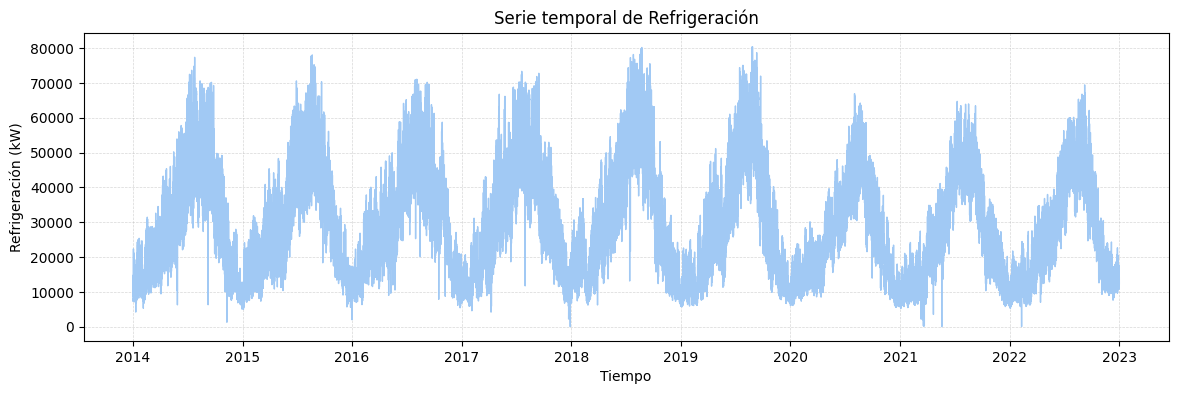

In [235]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia.index, energia['Refrigeración (kW)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Refrigeración (kW)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Refrigeración')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()

Se puede ver como hay algunas bajadas sospechosas de valores en la gráfica, pero no lo vemos lo suficientemente graves para tener que tratarlas.

Ahora vamos a analizar los boxplot de la variable.

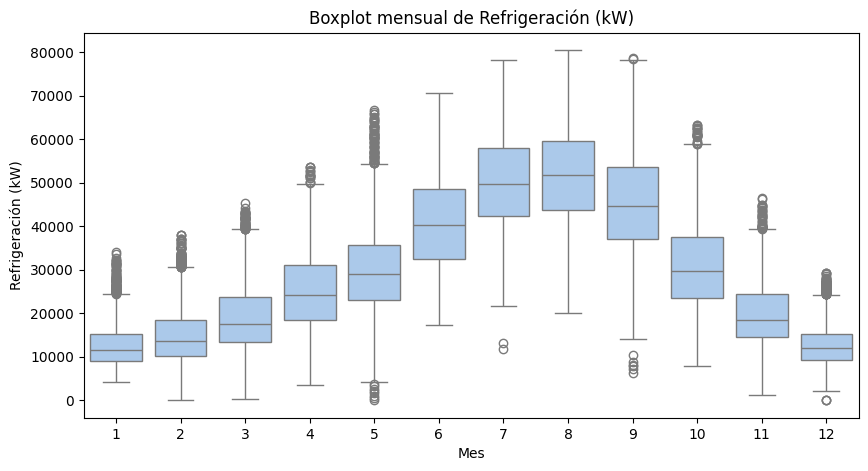

In [236]:
# Se crera una figura (10, 5)
plt.figure(figsize=(10, 5))

# Boxplot con el eje X los meses, e y la columna que queremos analizar
sns.boxplot(x=energia.index.month, y='Refrigeración (kW)', data=energia)

# Creamos la gráfica
plt.xlabel('Mes')
plt.ylabel('Refrigeración (kW)')
plt.title('Boxplot mensual de Refrigeración (kW)')
plt.show()

Podemos ver que aunque existen outliers son muy ligeros, y por lo tanto, no los tratamos. Debemos recordar que, el método intercuartílico para *outliers* (valores atípicos), identifica puntos de datos inusualmente altos o bajos usando el Rango Intercuartílico (IQR), calculando los límites inferior como \(Q1-1.5 x IQR\) y superior como \(Q3+1.5 x IQR\), donde \(Q1\) y \(Q3\) son los cuartiles 1 y 3, respectivamente, y cualquier dato fuera de estos límites se considera un outlier. **En vista del boxplot, los valores que aparecen dibujados como atípicos no parecen alejarse demasiado del rango intercuartílico, por lo que consideramos que pueden tratarse de valores altos que son algo excepcionales, pero que pueden ser normales. Por esto, decidimos no eliminarlos. Sólo quitaremos los *hard outliers*** 

Además, podemos ver un aumento de Refrigeración consumida en los meses de verano.

#### Calefacción (kWh)

Al principio de todo, tratamos los valores nulos a partir de las otras 3 variables de las que depende. Para ello, las otras 3 columnas deberán estar presentes en aquella fila en la que esté el valor nulo localizado. 

In [237]:
# Serie booleana que irá guardando a True que sean nulos la fila que queremos y no nulos las otras columnas en esa misma fila, con cada uno de los nulos
mask = (
    energia['Calefacción (kWh)'].isna() &
    energia[['Electricidad (kW)', 'Refrigeración (kW)', 'Energía total (kWh)']].notna().all(axis=1)
)
# Rellena los valores donde mask era igual a true
energia.loc[mask, 'Calefacción (kWh)'] = (
    energia.loc[mask, 'Energía total (kWh)'] -
    energia.loc[mask, 'Electricidad (kW)'] -
    energia.loc[mask, 'Refrigeración (kW)']
)

Analizamos la variable Calefacción (kWh).

In [238]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia['Calefacción (kWh)'].describe())

count    7.887100e+04
mean     3.136308e+28
std      8.807580e+30
min     -2.930710e+00
25%      1.462424e+03
50%      1.828763e+03
75%      2.617124e+03
max      2.473519e+33
Name: Calefacción (kWh), dtype: float64


Podemos ver cómo el valor máximo es demasiado alto e irreal, y el número mínimo es negativo cuando no tiene sentido en el contexto del problema, por lo que procedemos a eliminarlos (sustituyéndolos por nulos), con el método de los percentiles, tanto superior como inferior. **Ahora usamos como percentil inferior, 0.001, y como percentil superior, 99.9.**

In [239]:
# establecemos los percentiles
cuartil_minimo = energia['Calefacción (kWh)'].quantile(0.0001)
cuartil_maximo = energia['Calefacción (kWh)'].quantile(0.999)

# Conservamos únicamente los datos en los cuales hemos establecido los límites
energia['Calefacción (kWh)'] = energia['Calefacción (kWh)'].where(
    (energia['Calefacción (kWh)'] >= cuartil_minimo) & (energia['Calefacción (kWh)'] <= cuartil_maximo)
)


Ahora revisaremos la cantidad de outliers que hemos eliminado.

In [240]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia.isna().sum()

Día de la semana         0
Electricidad (kW)        0
Fotovoltaica (kW)        0
Refrigeración (kW)       0
Calefacción (kWh)      102
Energía total (kWh)     17
Emisión (kg CO₂)        17
dtype: int64

Si no contamos los anteriores 17 nulos, vemos que hemos eliminado 85 outliers. Para rellenar nulos utilizaremos la interpolación temporal.

In [241]:
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
energia['Calefacción (kWh)'] = energia['Calefacción (kWh)'].interpolate(method='time')

Ahora veremos como ha quedado el dataset después del interpolado temporal.

In [242]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
energia['Calefacción (kWh)'].describe()

count    78888.000000
mean      2162.803128
std       1038.985587
min          0.000000
25%       1462.424290
50%       1828.763040
75%       2614.193320
max       8370.107760
Name: Calefacción (kWh), dtype: float64

Podemos ver cómo ya no quedan nulos y como todos los valores parecen aceptables, ahora revisaremos la gráfica.

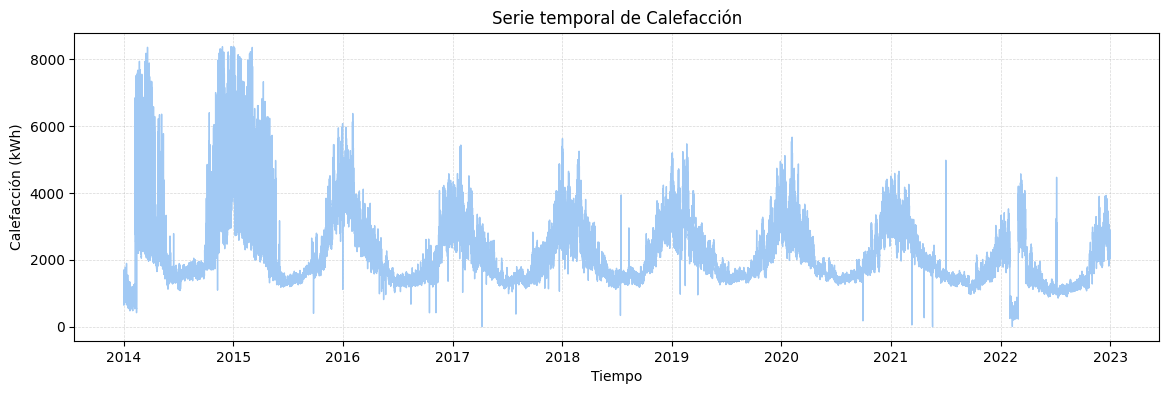

In [243]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia.index, energia['Calefacción (kWh)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Calefacción (kWh)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Calefacción')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Se puede ver cómo la gráfica muestra un comportamiento más correcto por lo general, aunque vemos un comportamiento raro al poco tiempo de comenzar el año 2022, posiblemente debido a factores internos o externos al sistema, como incidencias técnicas, ajustes operativos o periodos de menor ocupación. Es posible que hubiera habido fallos en los sistemas de calefacción durante ese período de tiempo.

Ahora revisaremos los boxplot de la variable.

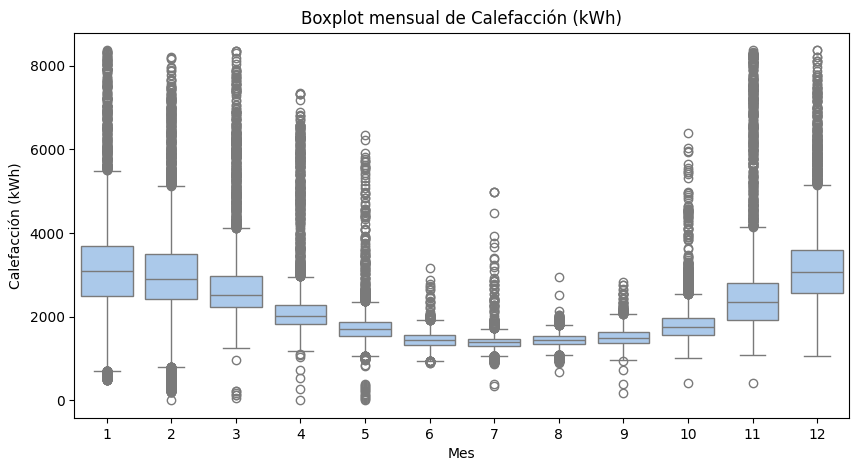

In [244]:
# Se crera una figura (10, 5)
plt.figure(figsize=(10, 5))

# Boxplot con el eje X los meses, e y la columna que queremos analizar
sns.boxplot(x=energia.index.month, y='Calefacción (kWh)', data=energia)

# Creamos la gráfica
plt.xlabel('Mes')
plt.ylabel('Calefacción (kWh)')
plt.title('Boxplot mensual de Calefacción (kWh)')
plt.show()

Podemos ver que aunque existen outliers son muy ligeros, y por lo tanto, no los tratamos. Debemos recordar que, el método intercuartílico para *outliers* (valores atípicos), identifica puntos de datos inusualmente altos o bajos usando el Rango Intercuartílico (IQR), calculando los límites inferior como \(Q1-1.5 x IQR\) y superior como \(Q3+1.5 x IQR\), donde \(Q1\) y \(Q3\) son los cuartiles 1 y 3, respectivamente, y cualquier dato fuera de estos límites se considera un outlier. **En vista del boxplot, Sólo quitaremos los *hard outliers*** 

Además, podemos ver un aumento de Refrigeración consumida en los meses de verano.

#### Energía total (kWh)

Vamos a analizar la variable Energía total.

In [79]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia['Energía total (kWh)'].describe())

count    7.887100e+04
mean    -3.529332e+31
std      1.128069e+34
min     -2.051497e+36
25%      4.058740e+04
50%      5.310153e+04
75%      7.177602e+04
max      1.289512e+36
Name: Energía total (kWh), dtype: float64


Como podemos ver en el enunciado de la práctica, que la variable "Energía total (kWh)" es la suma total de las variables "Electricidad (kW)", "Refrigeración (kW)" y "Calefacción (kWh)", por lo que **trataremos los outliers reemplazando los valores que no nos coincidan con la suma de las 3 variables**.

In [80]:
# Calcula la suma correcta por fila
suma_energia = (
    energia['Electricidad (kW)'] +
    energia['Refrigeración (kW)'] +
    energia['Calefacción (kWh)']
)

# Reemplaza solo donde no coincide
energia.loc[
    energia['Energía total (kWh)'] != suma_energia,
    'Energía total (kWh)'
] = suma_energia

Una vez calculada, comprobaremos cómo ha quedado nuestra variable.

In [81]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
energia['Energía total (kWh)'].describe()

count     78888.000000
mean      57359.573104
std       20444.996954
min       17624.088000
25%       40587.175845
50%       53075.334005
75%       71717.465835
max      125635.475740
Name: Energía total (kWh), dtype: float64

Vemos cómo nuestro dataset ya contiene valores aceptables. Ahora veremos su representación de su serie temporal en una gráfica.

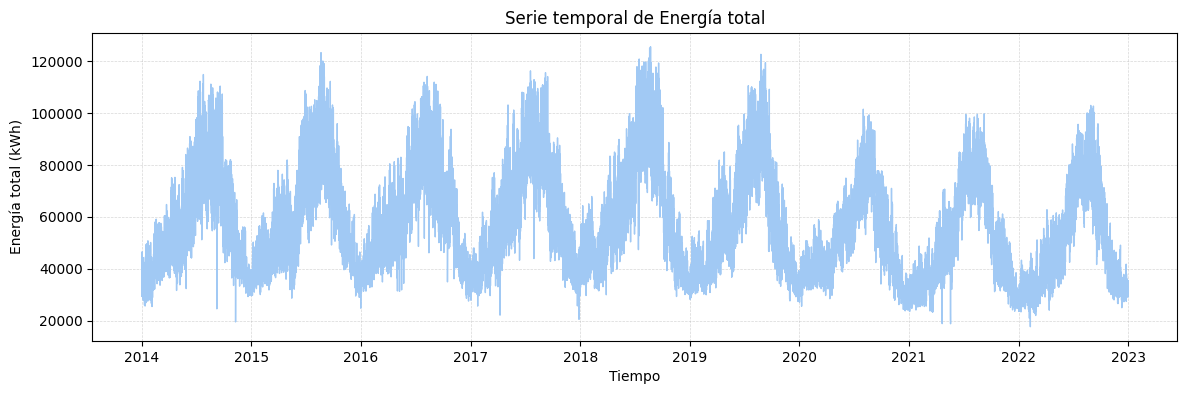

In [82]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia.index, energia['Energía total (kWh)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Energía total (kWh)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Energía total')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Vemos como la gráfica parece funcionar de manera correcta. 

Por último, vamos a analizar los boxplot de la variable.

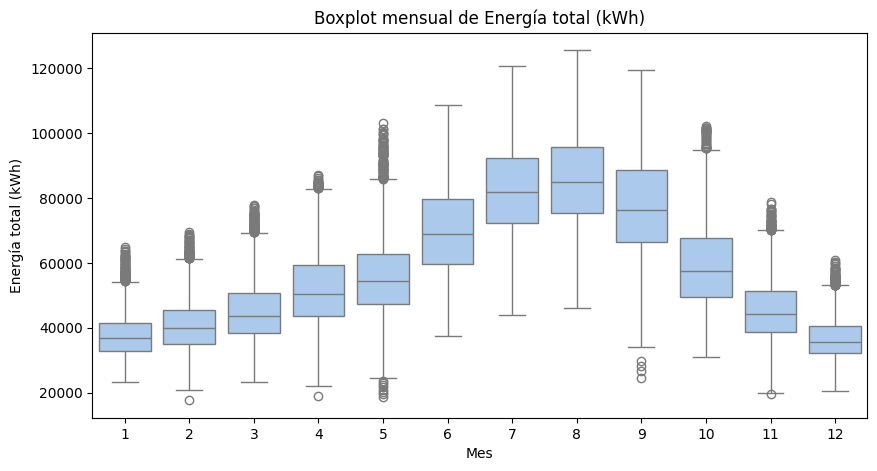

In [83]:
# Se crera una figura (10, 5)
plt.figure(figsize=(10, 5))

# Boxplot con el eje X los meses, e y la columna que queremos analizar
sns.boxplot(x=energia.index.month, y='Energía total (kWh)', data=energia)

# Creamos la gráfica
plt.xlabel('Mes')
plt.ylabel('Energía total (kWh)')
plt.title('Boxplot mensual de Energía total (kWh)')
plt.show()

Podemos ver que aunque existen outliers son muy ligeros, y por lo tanto, no los tratamos. Debemos recordar que, el método intercuartílico para *outliers* (valores atípicos), identifica puntos de datos inusualmente altos o bajos usando el Rango Intercuartílico (IQR), calculando los límites inferior como \(Q1-1.5 x IQR\) y superior como \(Q3+1.5 x IQR\), donde \(Q1\) y \(Q3\) son los cuartiles 1 y 3, respectivamente, y cualquier dato fuera de estos límites se considera un outlier. **En vista del boxplot, los valores que aparecen dibujados como atípicos no parecen alejarse demasiado del rango intercuartílico, por lo que consideramos que pueden tratarse de valores altos que son algo excepcionales, pero que pueden ser normales. Por esto, decidimos no eliminarlos.** También se ve un aumento en meses de verano el consumo de energía total.

#### Emisión (kg CO₂)

Vamos a analizar como funciona la variable.

In [76]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia['Emisión (kg CO₂)'].describe())

count    7.887100e+04
mean    -2.198426e+31
std      7.032879e+33
min     -1.280000e+36
25%      2.531000e+04
50%      3.312000e+04
75%      4.476000e+04
max      8.050000e+35
Name: Emisión (kg CO₂), dtype: float64


Vemos que tenemos unos datos extremadamente grandes y extremadamente negativos para el máximo y el mínimo de la variable. En la variable no tienen sentido este tipo de datos, por lo que estableceremos percentiles superior e inferior para tratarlos. **Ahora usamos 0.02 como percentil inferior y 99.9 como percentil superior.**

In [77]:
# establecemos los percentiles
cuartil_minimo = energia['Emisión (kg CO₂)'].quantile(0.002)
cuartil_maximo = energia['Emisión (kg CO₂)'].quantile(0.999)

# Conservamos únicamente los datos en los cuales hemos establecido los límites
energia['Emisión (kg CO₂)'] = energia['Emisión (kg CO₂)'].where(
    (energia['Emisión (kg CO₂)'] >= cuartil_minimo) & (energia['Emisión (kg CO₂)'] <= cuartil_maximo)
)

Comprobamos la cantidad de outliers detectados y eliminados.

In [78]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia.isna().sum()

Día de la semana         0
Electricidad (kW)        0
Fotovoltaica (kW)        0
Refrigeración (kW)       0
Calefacción (kWh)        0
Energía total (kWh)      0
Emisión (kg CO₂)       254
dtype: int64

Sin contar los 17 nulos anteriores, vemos que tenemos 237 elementos que hemos eliminado, por lo que ahora imputaremos por interpolación temporal.

In [79]:
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
energia['Emisión (kg CO₂)'] = energia['Emisión (kg CO₂)'].interpolate(method='time')

Vemos cómo ha quedado el dataset y si ha quedado algún nulo sin rellenar.

In [80]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
energia['Emisión (kg CO₂)'].describe()

count    78888.000000
mean     35787.470464
std      12744.032516
min      14260.000000
25%      25330.000000
50%      33120.000000
75%      44750.000000
max      74540.000000
Name: Emisión (kg CO₂), dtype: float64

Vemos cómo no hay nulos y sus datos tienen valores lógicos con el resto de valores de la variable. Ahora veremos su representación temporal en una gráfica.

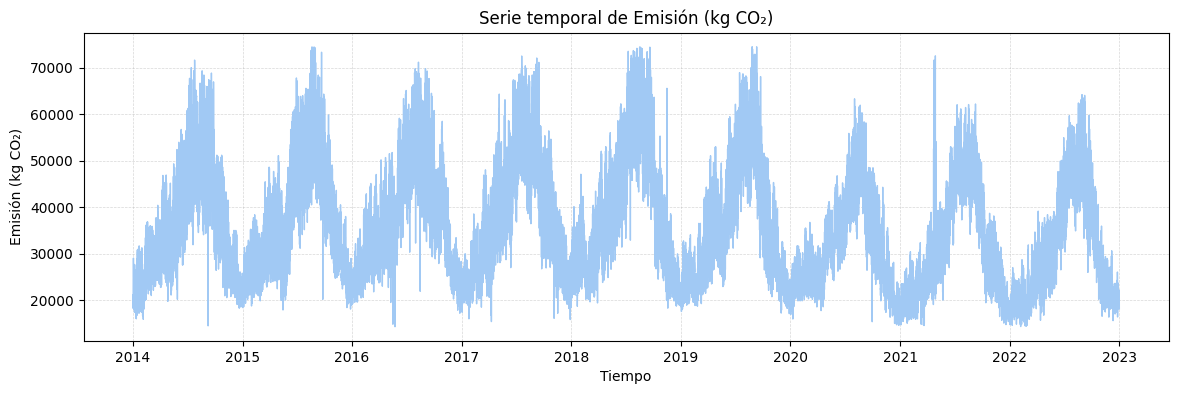

In [81]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia.index, energia['Emisión (kg CO₂)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Emisión (kg CO₂)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Emisión (kg CO₂)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Vemos como la gráfica por lo general funciona bastante bien. `Más adelante haremos un análisis más profundo de cada una de estas series y procederemos a la caracterización de cada una de ellas.`

### Tabla de correlación

Ahora vamos a estudiar las correlaciones del dataset.

En primer lugar vamos a revisar la varianza.

In [82]:
# Calcular varianza de todas las columnas numéricas
varianza = energia.var()
varianza


Día de la semana       3.997008e+00
Electricidad (kW)      2.944654e+07
Fotovoltaica (kW)      2.799875e+07
Refrigeración (kW)     2.673083e+08
Calefacción (kWh)      1.079491e+06
Energía total (kWh)    4.179979e+08
Emisión (kg CO₂)       1.624104e+08
dtype: float64

No hay ninguna varianza cercana a 0, por lo tanto no eliminamos nada.

Ahora revisamos qué variables tienen más correlación con la variable objetivo "Energía total (kWh)".

In [83]:
# Hacemos una matriz de correlación y visualizaremos sobre nuestra columna objetivo cuáles columnas parecen ser la más influyentes 
matriz_correlacion = energia.corr()
# Visualizaremos de mayor a menor
matriz_correlacion["Energía total (kWh)"].sort_values(ascending=False)

Energía total (kWh)    1.000000
Emisión (kg CO₂)       0.998728
Refrigeración (kW)     0.985781
Electricidad (kW)      0.899219
Fotovoltaica (kW)      0.347314
Día de la semana      -0.079916
Calefacción (kWh)     -0.530983
Name: Energía total (kWh), dtype: float64

Vemos que en "Emisión (kg CO₂)", tal y como habíamos visto cuando explicábamos las gráficas de las variables sin aún haber eliminado outliers, hay una correlación casi del 100%. De momento, no la tocaremos hasta ver más detalles en la matriz de correlación.

Otras variables con mucha correlación son: Refrigeración (kW), Electricidad (kW) y Calefacción (kWh). Son las 3 variables que utilizamos para calcular la variable objetivo, por lo tanto tiene sentido que haya una alta correlación y no las tocaremos.

Por último, vemos que "Día de la semana" tiene muy poca correlación con nuestra variable objetivo, pero no la eliminaremos ya que nos puede seguir siendo útil en series temporales, como es el caso de capturar patrones semanales.

Por último, vamos a revisar la matriz de correlación.

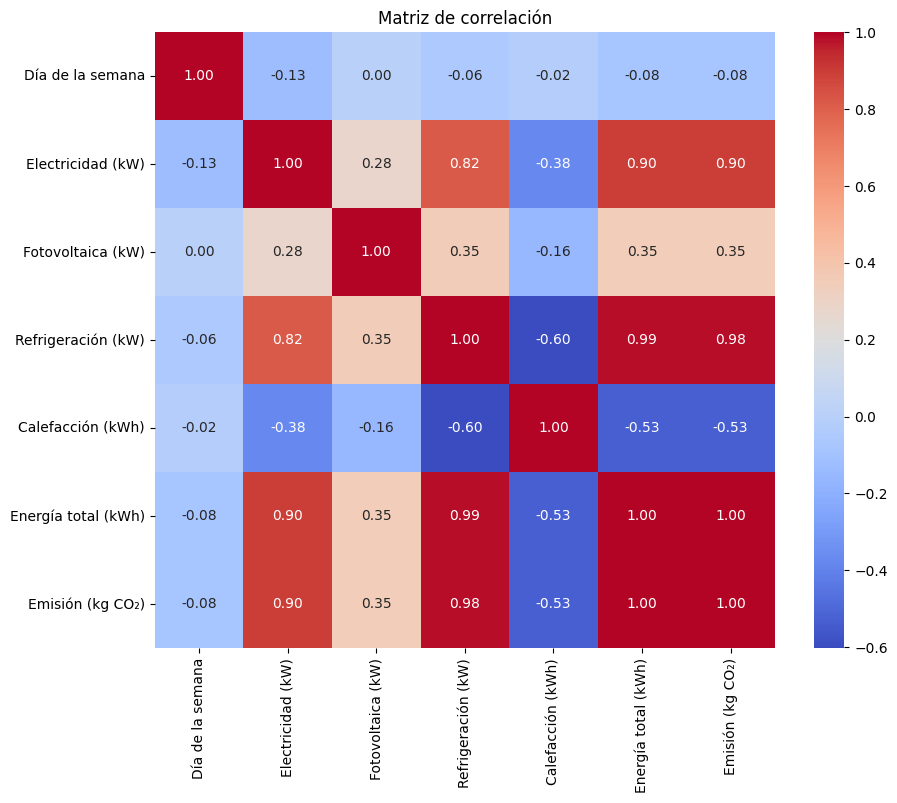

In [84]:
# Crear la tabla de correlación
correlation_matrix = energia.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

Como podemos ver, se dan bastantes casos de alta correlación entre variables, **destacando sobre todo "Emisión (kg CO₂)" con una correlación de 1.00**. **Decidimos no eliminar nada, pese al peligro de que haya problemas de multicolinealidad, porque el dataset ya contiene muy pocas variables (7) y pensamos que puede seguir siéndonos útil.**

### Transformacion a días

Ante la gran cantidad de datos y el hecho de que **el problema nos pide un horizonte temporal de 7 días, no tiene mucho sentido que los datos estén en formato horario. Por ello, decidimos cambiar la granularidad temporal de los datos para que sean diarios.** Para ello, hacemos un resample diario que sume todos los datos de cada día, puesto que estamos agregandos datos totales de consumo y producción de energía para cada día dado. Debemos tener en cuenta que "Día de la semana" no queremos que cambie, y como cada fila es la suma de si mismo 24 veces, decidimos hacer una división de 24 y transformarlo en entero.

In [85]:
# Guardamos una copia
energia_horas = energia
# Cambia frecuencia temporal
energia = energia.resample('D').sum()
# Divide entre 24 los datos de la variable
energia['Día de la semana'] = energia['Día de la semana']/24
# Transforma a entero la variable
energia['Día de la semana'] = energia['Día de la semana'].astype(int)

Revisamos como han quedado las 10 primeras filas.

In [86]:
# Visualizamos las 5 primeras columnas del dataset
energia.head(10)

,Día de la semana,Electricidad (kW),Fotovoltaica (kW),Refrigeración (kW),Calefacción (kWh),Energía total (kWh),Emisión (kg CO₂)
2014-01-01,2,490049.28,62795.47,243369.71770,20107.60131,753526.59901,469960.0
2014-01-02,3,556486.56,64284.00,323886.05169,23987.86135,904360.47304,564020.0
2014-01-03,4,545831.45,67187.06,337004.60237,22112.20695,904948.25932,564390.0
2014-01-04,5,511495.56,46798.28,252493.06189,21074.73561,785063.35750,489640.0
2014-01-05,6,502806.80,70162.87,249265.37031,22777.47812,774849.64843,483270.0
2014-01-06,0,543968.35,71666.60,285299.00483,27314.21720,856581.57203,534210.0
2014-01-07,1,562002.91,52517.04,274781.34599,23633.24544,860417.50143,536630.0
2014-01-08,2,557214.72,66145.06,265609.15067,24020.09916,846843.96983,528160.0
2014-01-09,3,563161.10,50888.52,243592.34380,23108.64835,829862.09215,517550.0
2014-01-10,4,520356.53,62773.62,235918.63667,22238.22748,778513.39415,485540.0


Revisamos como ha quedado nuestro dataset en general.

In [87]:
# Información del dataset
energia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3287 entries, 2014-01-01 to 2022-12-31
Freq: D
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Día de la semana     3287 non-null   int64  
 1   Electricidad (kW)    3287 non-null   float64
 2   Fotovoltaica (kW)    3287 non-null   float64
 3   Refrigeración (kW)   3287 non-null   float64
 4   Calefacción (kWh)    3287 non-null   float64
 5   Energía total (kWh)  3287 non-null   float64
 6   Emisión (kg CO₂)     3287 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 205.4 KB


Vemos como nuestro dataset ha pasado de 78888 a 3287 entradas (78888/24) y todo lo demás queda igual. **Ahora estos datos son mucho más manejables y coinciden con la granularidad temporal que nos exige el problema.**

### Análisis de las variables

`Hay que tener en cuenta que aunque en varias partes de los análisis de las variables tengamos que ir cambiando su granularidad (para que se vea más suavizadas las lineas temporales de las variables y podamos interpretarlas com mayor sencillez), siempre tendremos frecuencia diaria en nuestro dataset, y esto no cambiará.`

Vamos a analizar sobre todas nuestras variables, su tendencia, estacionalidad, ruido, estacionariedad y autocorrelación. Así conseguiremos caracterizar cada una de las series del dataset.

#### Energía total (kWh)

Primero empezamos con la variable objetivo, ya que es la más importante de nuestro dataset.

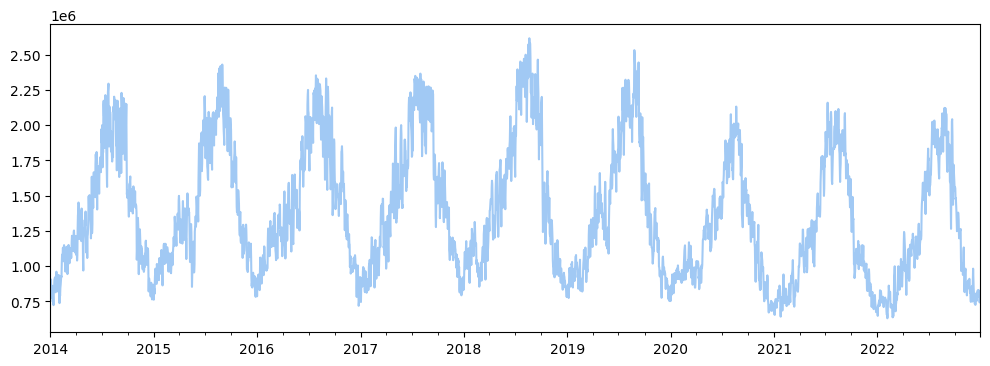

In [88]:
# Creamos una gráfica de tamaño (12,4) de la variable Energía total (kWh)
plt.figure(figsize=(12,4))
energia['Energía total (kWh)'].plot()
plt.show()

Se puede ver a simple vista que la serie es bastante densa, posiblemente porque aún tenemos bastantes datos, por lo tanto vamos a realizar una reducción de granularidad a semana, mes y año para analizar esta variable con más facilidad.

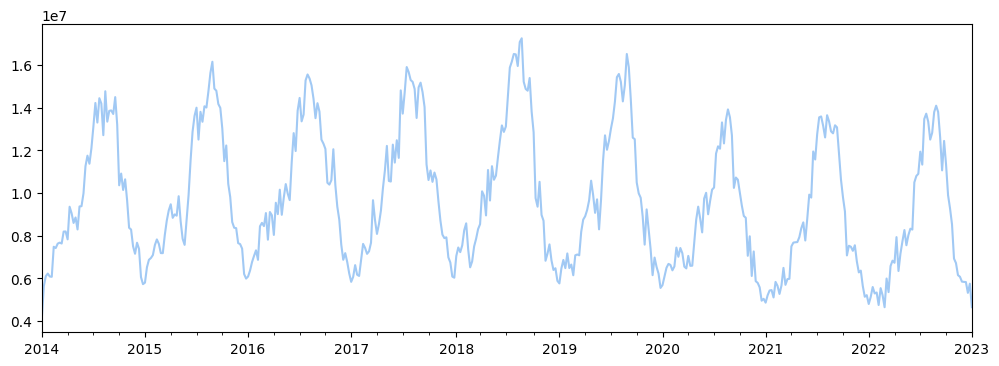

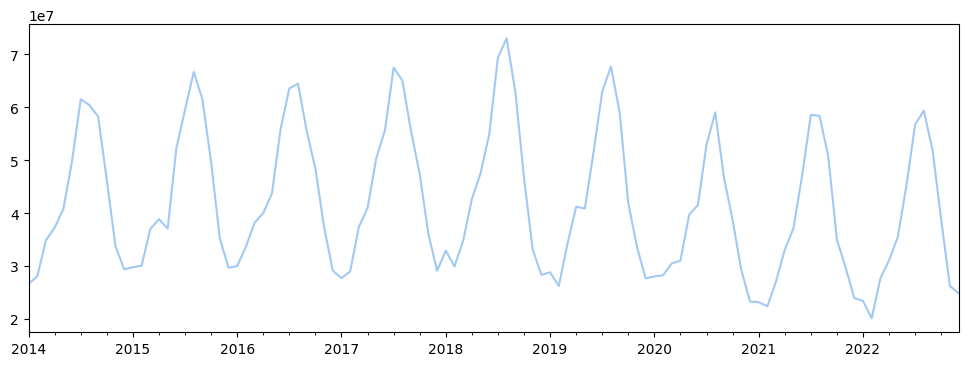

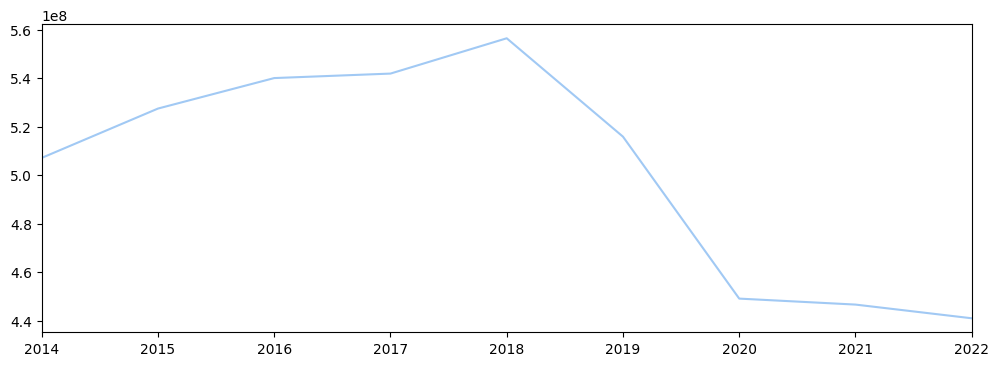

In [89]:
# Reduce granularidad a semanal de la variable
energia_semanal = energia['Energía total (kWh)'].resample('W').sum()
# Reduce granularidad a mensual de la variable
energia_mensual = energia['Energía total (kWh)'].resample('ME').sum()
# Reduce granularidad a anual de la variable
energia_anual = energia['Energía total (kWh)'].resample('YE').sum()

# Crea una gráfica (12,4) con granularidad semanal de la variable
plt.figure(figsize=(12,4))
energia_semanal.plot()
plt.show()

# Crea una gráfica (12,4) con granularidad semanal de la variable
plt.figure(figsize=(12,4))
energia_mensual.plot()
plt.show()

# Crea una gráfica (12,4) con granularidad semanal de la variable
plt.figure(figsize=(12,4))
energia_anual.plot()
plt.show()

Con granularidad anual podemos ver claramente la tendencia en el tiempo de la variable, en la cual parece haber una tendencia ascendente desde 2014 hasta 2018, luego decrementa fuertemente desde 2018 hasta 2020, y luego sigue decrementando desde 2020 hasta 2022 de forma mucho menos notoria.

Ahora vamos a revisar si hay alguna posible estacionalidad, y para que se vea de forma más o menos clara,  dibujaremos las gráficas cada 3 años.

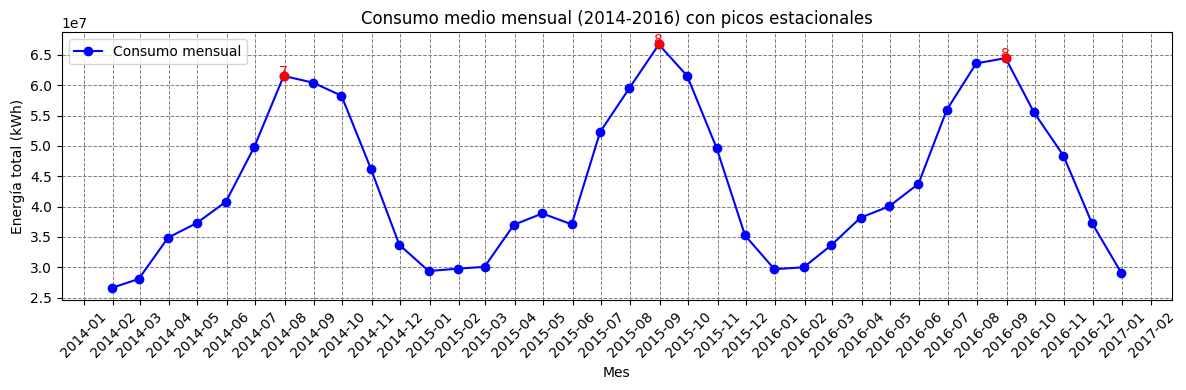

In [90]:
# Selección de rango
ts = energia_mensual["2014":"2016"]

# Crear la figura
fig, ax = plt.subplots(figsize=(12,4))

# Graficar línea principal
ax.plot(ts.index, ts.values, marker='o', color='blue', label='Consumo mensual')

# Resaltar el pico de cada año
for year in ts.index.year.unique():
    pico = ts[ts.index.year == year].idxmax()
    ax.scatter(pico, ts[pico], color='red', zorder=5)
    ax.text(pico, ts[pico]+0.1, str(pico.month), ha='center', color='red')

# Título y etiquetas
ax.set_title("Consumo medio mensual (2014-2016) con picos estacionales")
ax.set_xlabel("Mes")
ax.set_ylabel("Energía total (kWh)")

# Grid
ax.grid(color='gray', linestyle='--', linewidth=0.7)

# Configurar eje X para mostrar todos los meses
ax.xaxis.set_major_locator(mdates.MonthLocator())  # cada mes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotar etiquetas para que no se superpongan
plt.xticks(rotation=45)

# Leyenda
ax.legend()

plt.tight_layout()
plt.show()


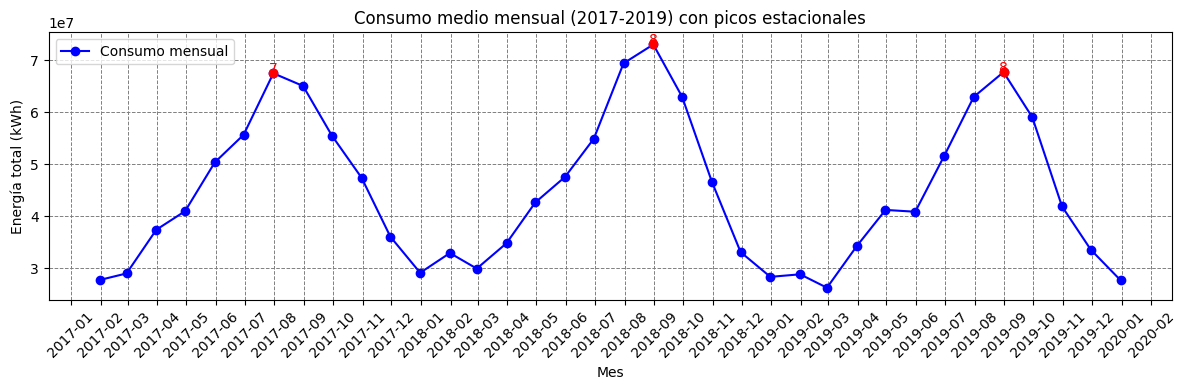

In [91]:
# Selección de rango
ts = energia_mensual["2017":"2019"]

# Crear la figura
fig, ax = plt.subplots(figsize=(12,4))

# Graficar línea principal
ax.plot(ts.index, ts.values, marker='o', color='blue', label='Consumo mensual')

# Resaltar el pico de cada año
for year in ts.index.year.unique():
    pico = ts[ts.index.year == year].idxmax()
    ax.scatter(pico, ts[pico], color='red', zorder=5)
    ax.text(pico, ts[pico]+0.1, str(pico.month), ha='center', color='red')

# Título y etiquetas
ax.set_title("Consumo medio mensual (2017-2019) con picos estacionales")
ax.set_xlabel("Mes")
ax.set_ylabel("Energía total (kWh)")

# Grid
ax.grid(color='gray', linestyle='--', linewidth=0.7)

# Configurar eje X para mostrar todos los meses
ax.xaxis.set_major_locator(mdates.MonthLocator())  # cada mes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotar etiquetas para que no se superpongan
plt.xticks(rotation=45)

# Leyenda
ax.legend()

plt.tight_layout()
plt.show()


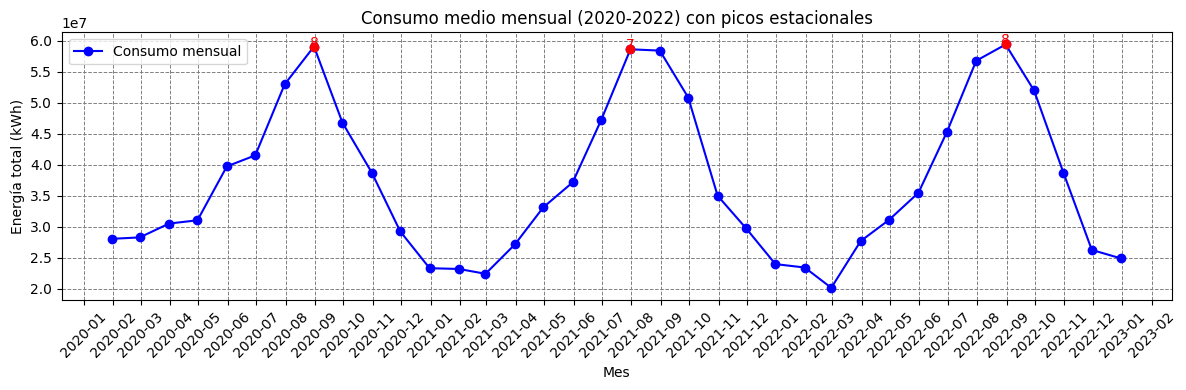

In [92]:
# Selección de rango
ts = energia_mensual["2020":"2022"]

# Crear la figura
fig, ax = plt.subplots(figsize=(12,4))

# Graficar línea principal
ax.plot(ts.index, ts.values, marker='o', color='blue', label='Consumo mensual')

# Resaltar el pico de cada año
for year in ts.index.year.unique():
    pico = ts[ts.index.year == year].idxmax()
    ax.scatter(pico, ts[pico], color='red', zorder=5)
    ax.text(pico, ts[pico]+0.1, str(pico.month), ha='center', color='red')

# Título y etiquetas
ax.set_title("Consumo medio mensual (2020-2022) con picos estacionales")
ax.set_xlabel("Mes")
ax.set_ylabel("Energía total (kWh)")

# Grid
ax.grid(color='gray', linestyle='--', linewidth=0.7)

# Configurar eje X para mostrar todos los meses
ax.xaxis.set_major_locator(mdates.MonthLocator())  # cada mes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotar etiquetas para que no se superpongan
plt.xticks(rotation=45)

# Leyenda
ax.legend()

plt.tight_layout()
plt.show()


Se puede ver que existe una posible estacionalidad, puesto que que parece que sube a partir de junio y baja a partir de septiembre u octubre, bajando de manera consistente hasta enero, cada año. Luego revisaremos la descomposición de la serie (método *decompose*) para confirmarlo.

Ahora vamos a analizar el histograma.

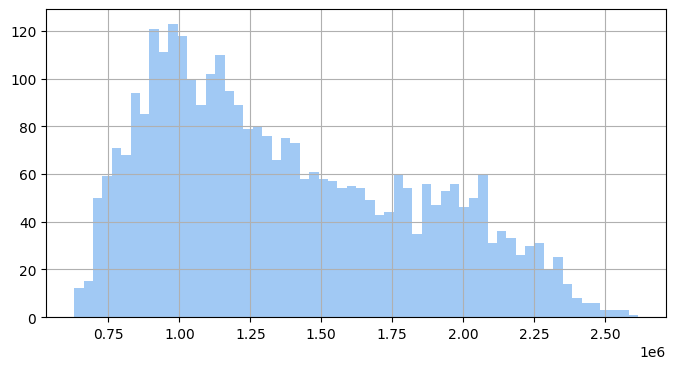

In [93]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia['Energía total (kWh)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores 700000 y 1400000, haciendo que la mayor parte de Energía total (kWh) esté entre la parte baja y mediana del histograma, haciendo que haya una cola hacia la derecha y por lo tanto, un sesgo positivo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante ancha.

Ahora vamos a analizar los componentes que tenemos al descomponer la variable.

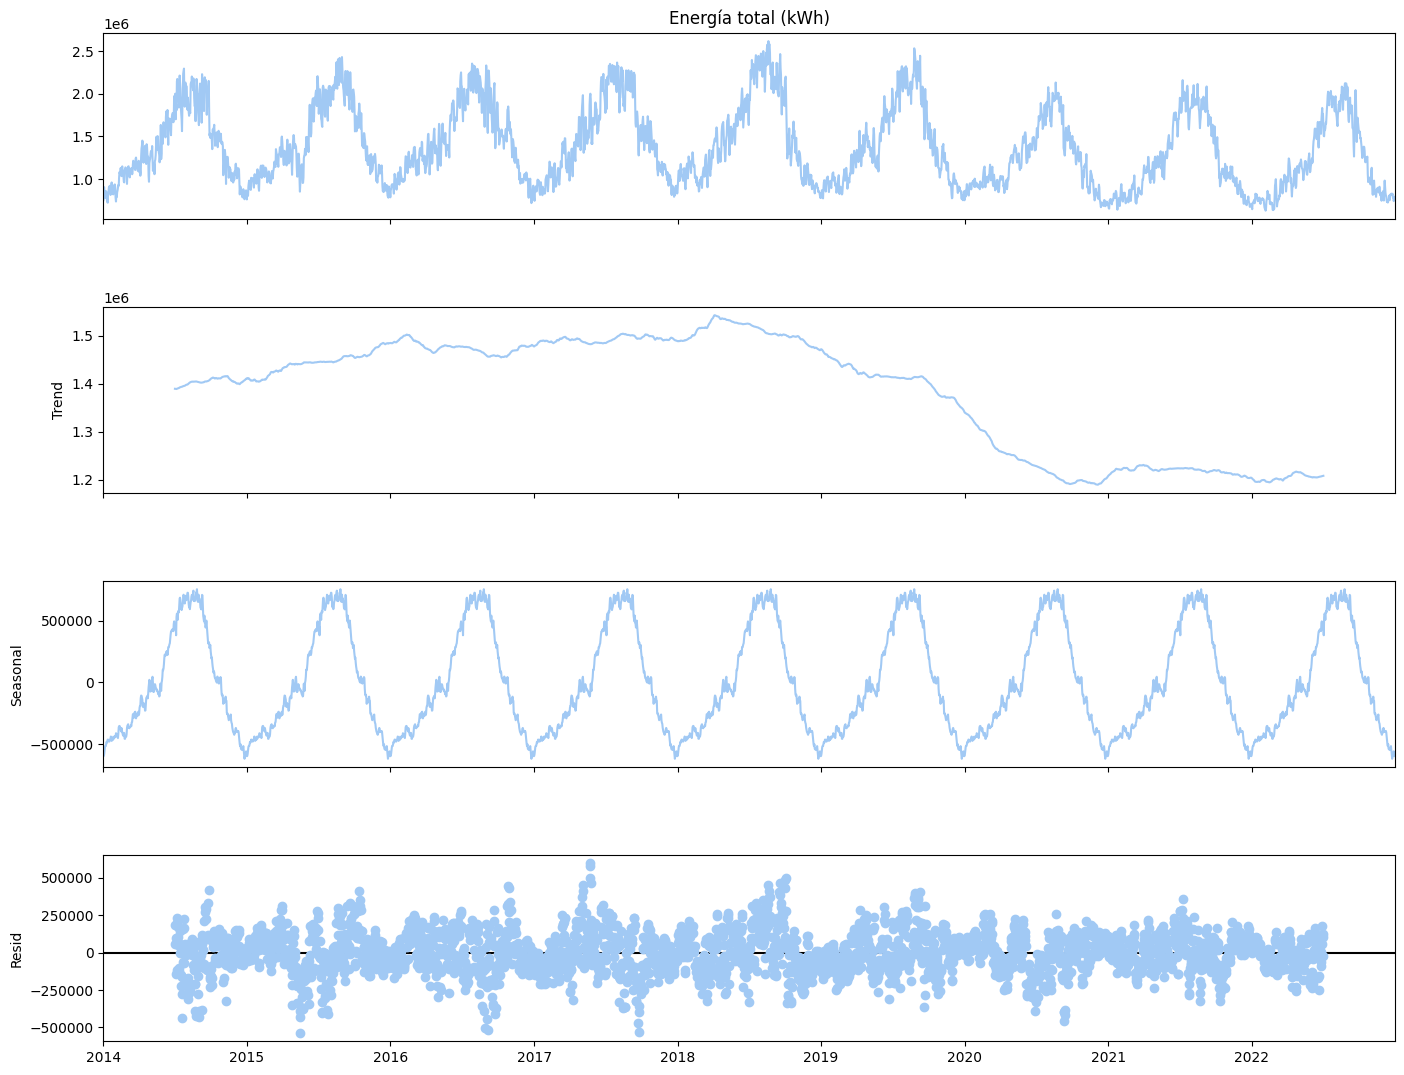

In [94]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia['Energía total (kWh)'], model='additive', period=365)
# Se imprime con un tamaño (16,12)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Vemos que parece haber una tendencia al principio ascedente y luego, claramente descendente. Parece haber estacionalidad anual y el ruido parace tener variabilidad constante y estar centrado en 0.

Después de varias pruebas, vemos cómo la tendencia y estacionalidad se pueden ver muy bien con un periodo anual (30*12). Primero revisaremos la tendencia, como habíamos hecho antes, donde había un ascenso, luego un descenso, y luego otro descenso mucho más lento.

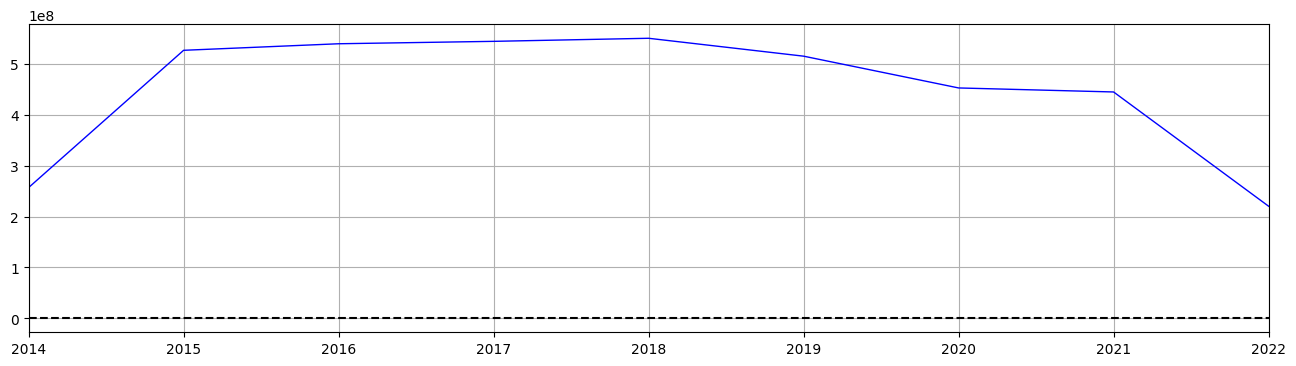

In [95]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad anual, se puede ver una tendencia que incrementa desde 2014 hasta 2018, y luego que desciende desde 2018 hasta 2022.

Comprobaremos la estacionalidad.

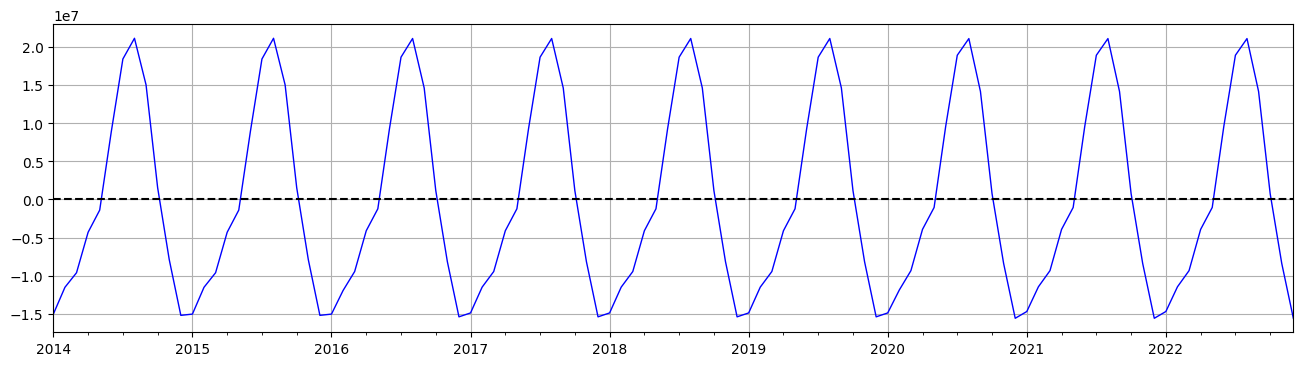

In [96]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Pese a que tenemos nuestro Seasonal en periodo anual, lo describimos a través de granularidad mensual. Podemos ver que, efectivamente, hay una estacionalidad en esta variable, ya que hay repeticiones del mismo patrón, haciendo que esta variable pueda ser fácilmente predecible ya que sabemos que se irá repitiendo cada año.

Ahora vamos a analizar el ruido.

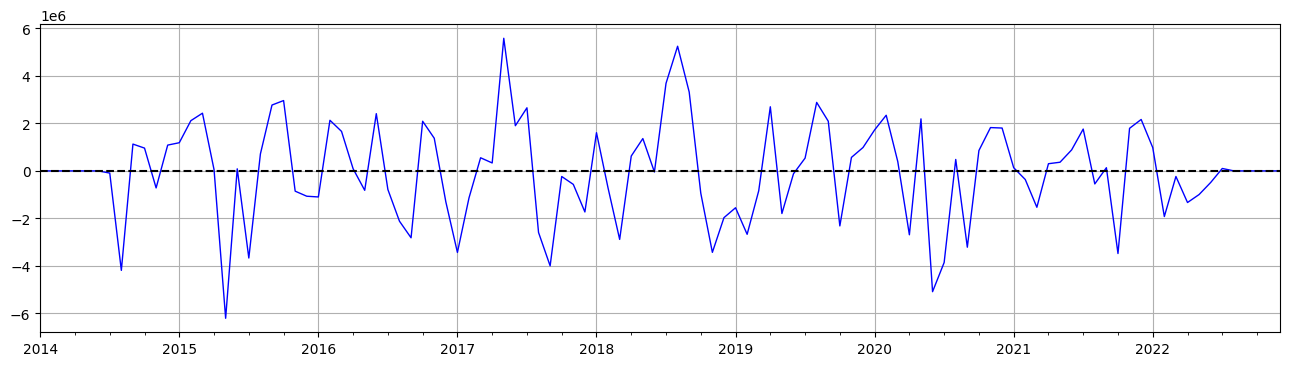

In [97]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Analizando el residual podemos ver cómo no recoge estacionalidad, oscila alrededor de 0 por lo que decompose está hecho de forma correcta. No hay tendencia, hay una variabilidad mas o menos constante, y no se nota la presencia de outliers.

Ahora vamos a revisar a ver si hay estacionalidad semanal en la variable objetivo.

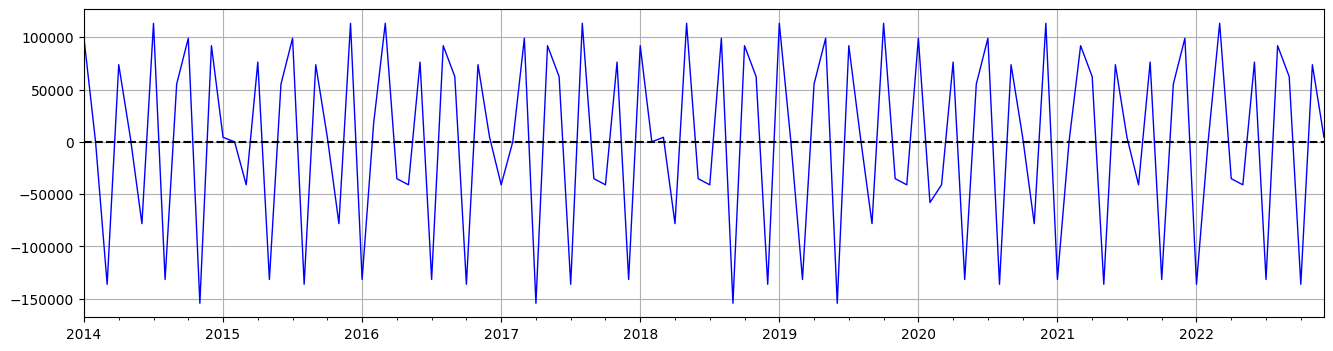

In [98]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia['Energía total (kWh)'], model='additive', period=7)

# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Podemos ver cómo también hay una estacionalidad semanal ya que hay una repetición de patrones a lo largo del tiempo.

Si lo miramos con más exactitud:

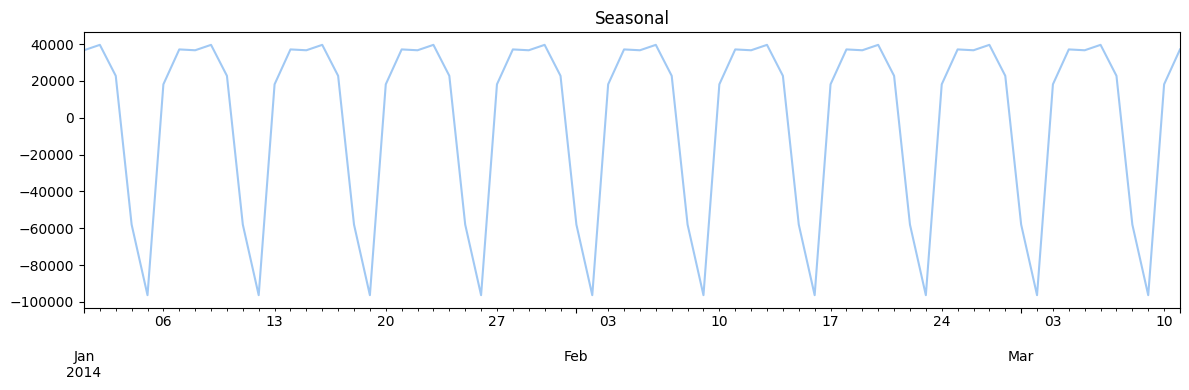

In [99]:
# Descomponer toda la serie
resultado = seasonal_decompose(energia['Energía total (kWh)'], model='additive', period=7)

# Definir número de días a mostrar
dias = 70

# Crear gráfico manual con solo los primeros X días
fig, axes = plt.subplots(1, 1, figsize=(12, 4))

resultado.seasonal[:dias].plot( title='Seasonal')

plt.tight_layout()
plt.show()

Si miramos con granularidad diaria los primeros 70 días de la serie, podemos ver con mayor exactitud la estacionalidad. Nuestra serie comienza en miércoles. Teniendo eso en cuenta, el primer pico inferior sería un domingo. A partir de este pico inferio,r la serie muestra cómo los días laborales de la semana el consumo es mayor y en fin de semana desciende.

Ahora vamos a hablar de la estacionariedad. Para ello aplicaremos el test estadístico de Dickey-Fuller.

In [100]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia['Energía total (kWh)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico ADF : -3.969350
p-value: 0.001580
Valores críticos:
	1%: -3.432
	5%: -2.862
	10%: -2.567


El p-valor es 0.001590 < 0.05, por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

**Por lo tanto, al ser estacionaria, decidimos no realizar ninguna transformación sobre nuestra serie temporal ni aplicar diferenciación cuando construyamos nuestos modelos predictivos.**

Ahora revisaremos la autocorrelación con lags=7, puesto que se nos pide un horizonte temporal de 7 días de la energía total consumida.

<Figure size 1000x600 with 0 Axes>

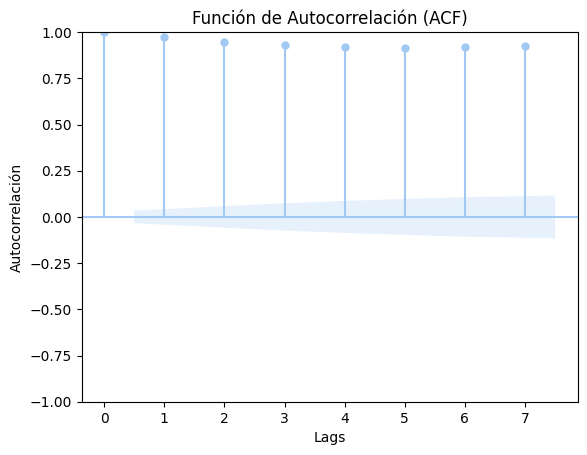

In [101]:
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_acf(energia['Energía total (kWh)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Se puede ver que hay una autocorrelación muy alta en todos los puntos del lag, todos encima del 75%, indicando una dependencia entre los valores presentes y pasados. Es decir, existe una gran correlación de cada punto de la series con los datos de la semana anterior.

Vemos cómo es la autocorrelación en un período anual.

<Figure size 1000x600 with 0 Axes>

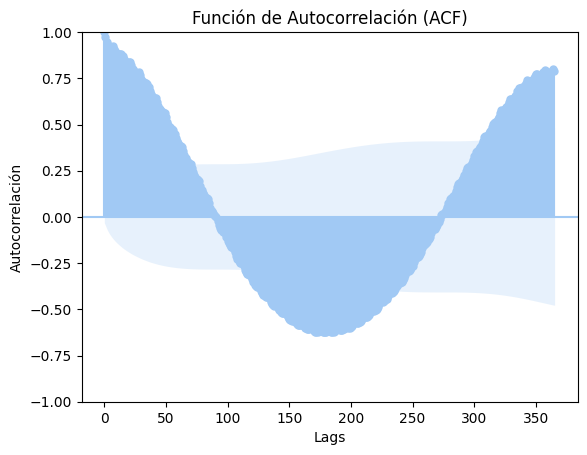

In [102]:
# Se crea una gráfcia de tamaño (10,6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Energía total (kWh)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Vemos que hasta poco en un mes (30 días), la autocorrelación sigue siendo alta. A partir de la mitad del año (180 días aprox.), existe una autorrelación negativa destacable. Esto puede confirmarnos, tal y como se puede ver en las gráficas, que el valor de la serie durante la mitad del año baja con la misma fuerza con la que subió con durante la otra mitad. Con lag=365 (un año) confirmamos también que hay mucha autocorrelación y por tanto, que hay estacionalidad.

Por tanto, en vista de estos datos, **veremos cómo se comportan nuestros modelos predictivos cuando usemos como valores de lag 7 días, 30, 183 y 365.**

#### Electricidad (kW)

Realizamos el histograma para ver como están distribuidos los datos.

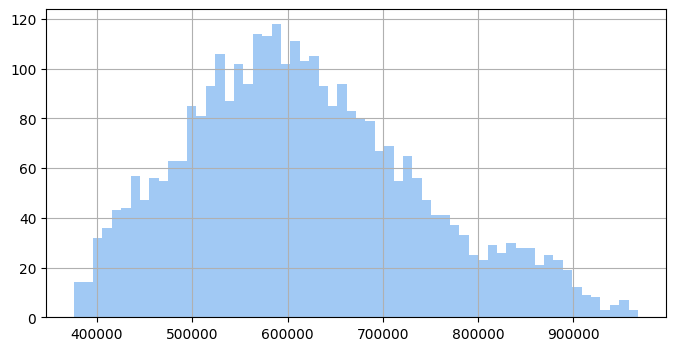

In [103]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia['Electricidad (kW)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores 450000 y 750000, haciendo que la mayor parte de Electricidad (kW) esté entre la parte baja y mediana superior del histograma, haciendo que haya una cola hacia la derecha y por lo tanto, un sesgo positivo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante ancha.

Ahora vamos a revisar el resto de componentes de la variable.

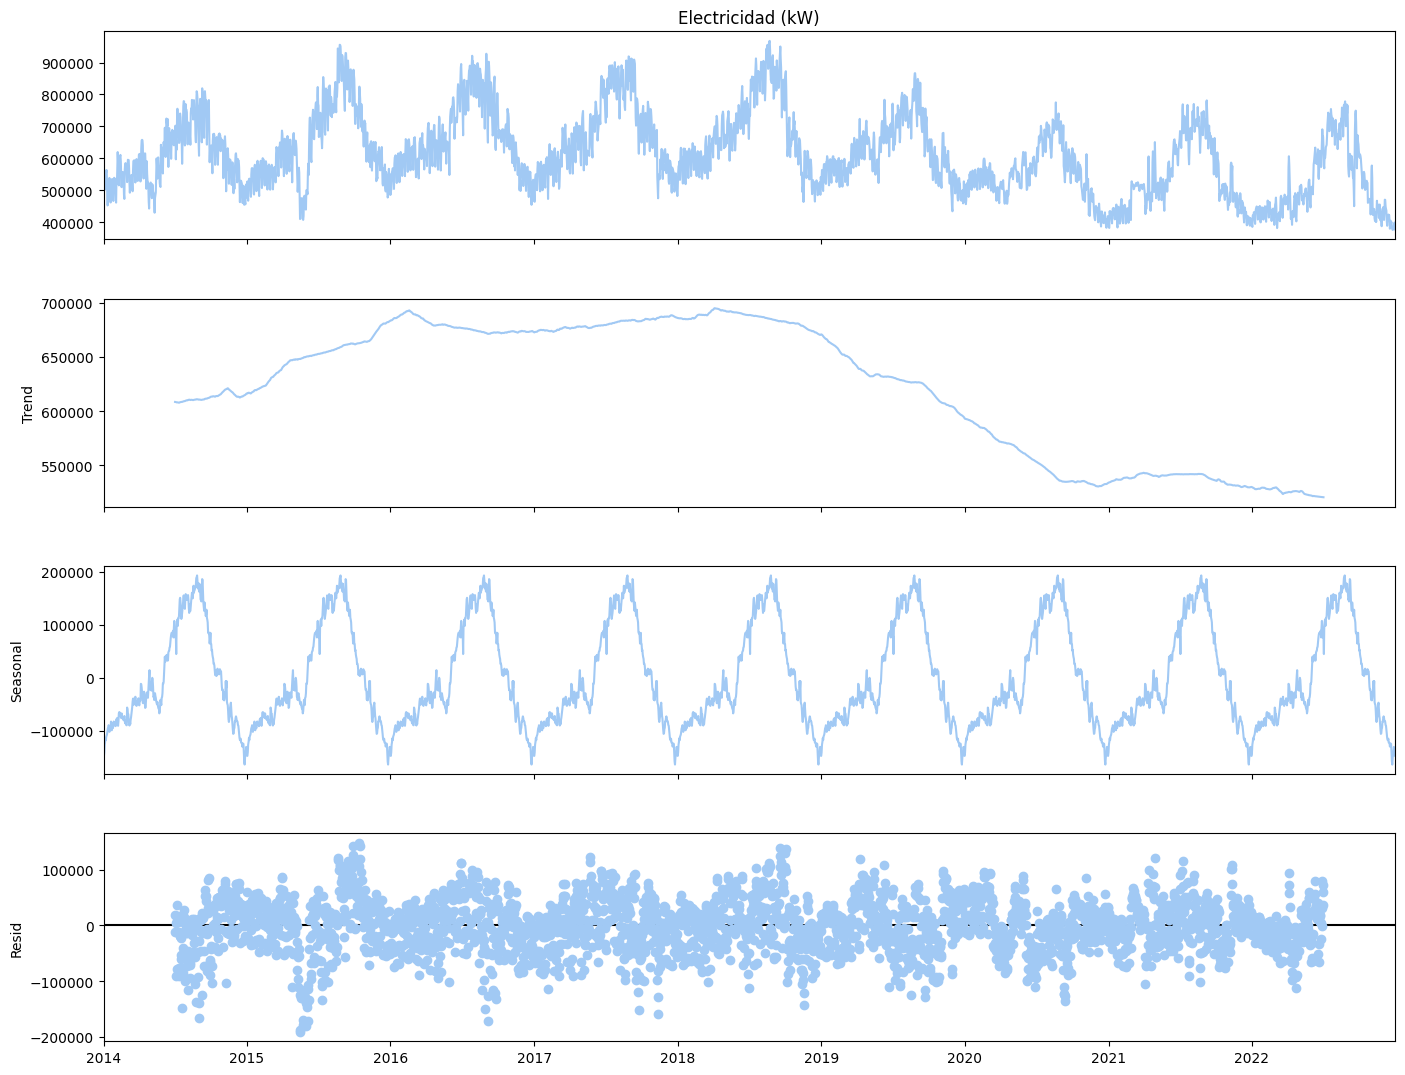

In [104]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia['Electricidad (kW)'], model='additive', period=365)
# Se imprime con un tamaño (16,12)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Establecemos un periodo anual porque es donde podemos ver bien la tendencia, estacionalidad y ruido de forma aceptable.

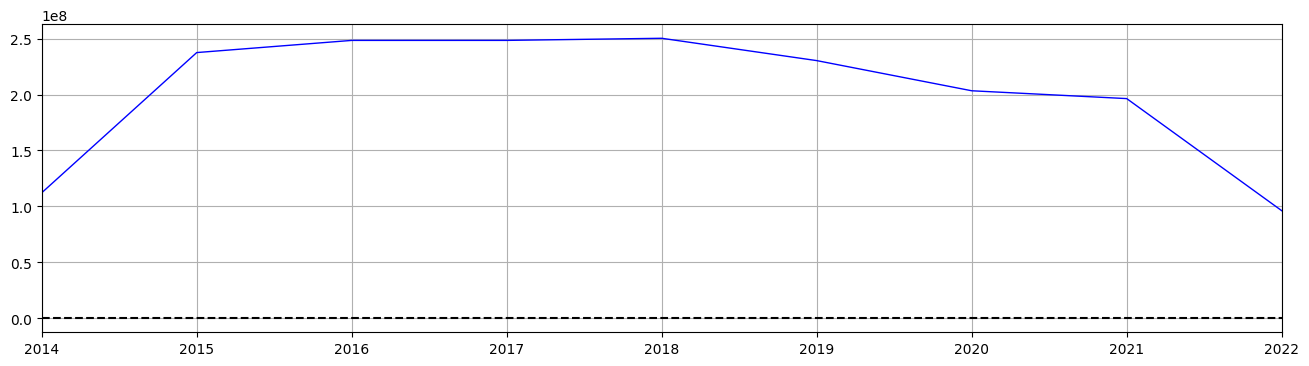

In [105]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad anual, vemos en la tendencia un ascenso desde 2014 a 2016, mantiene su valor hasta 2018, a partir de 2018 desciende.

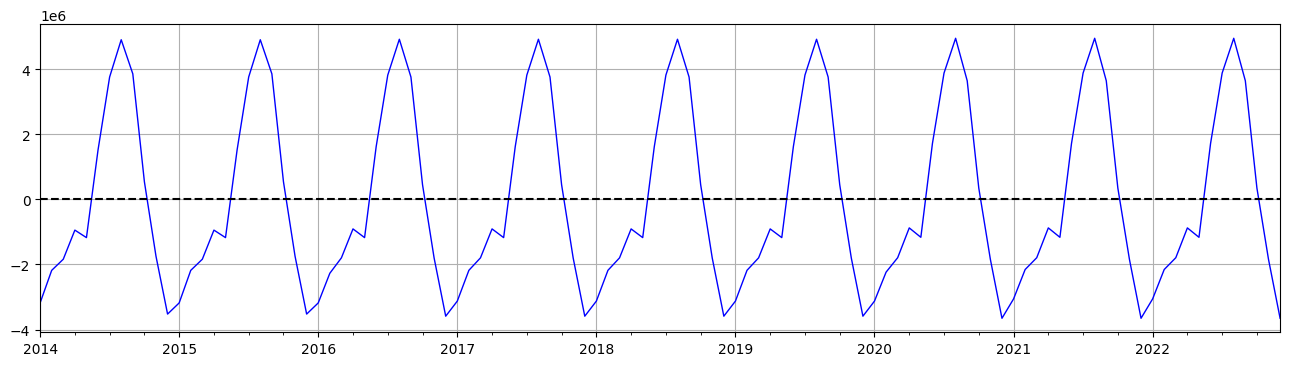

In [106]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual podemos ver como hay estacionalidad de forma clara, por lo que seguramente se repetirá el patrón en el futuro.

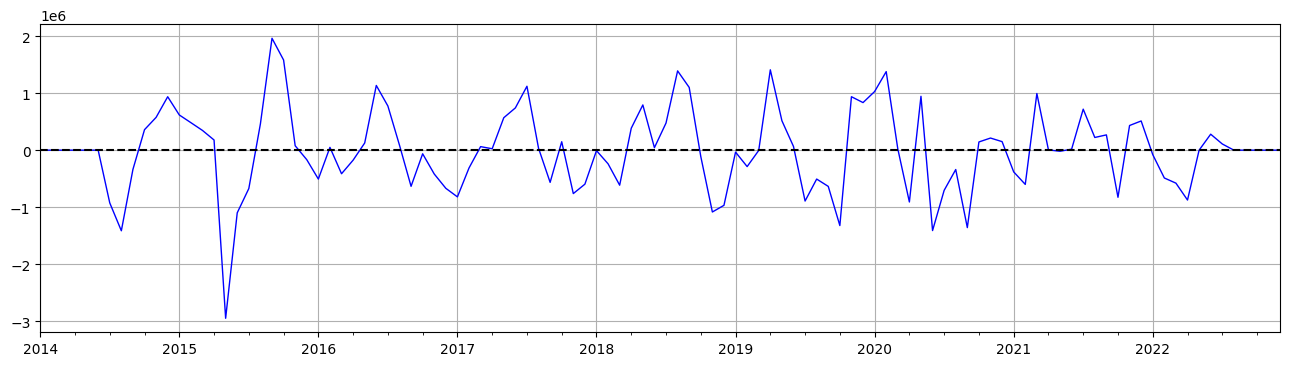

In [107]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, en cuanto al ruido, ronda alrededor de 0, no parece haber estacionalidad, ni outliers ni tendencia, y al principio de la gráfica hay más ruido que al final.

In [108]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia['Electricidad (kW)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico ADF : -3.425536
p-value: 0.010119
Valores críticos:
	1%: -3.432
	5%: -2.862
	10%: -2.567


0.010105 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

Por lo tanto decidimos no transformar nuestra serie temporal.

<Figure size 1000x600 with 0 Axes>

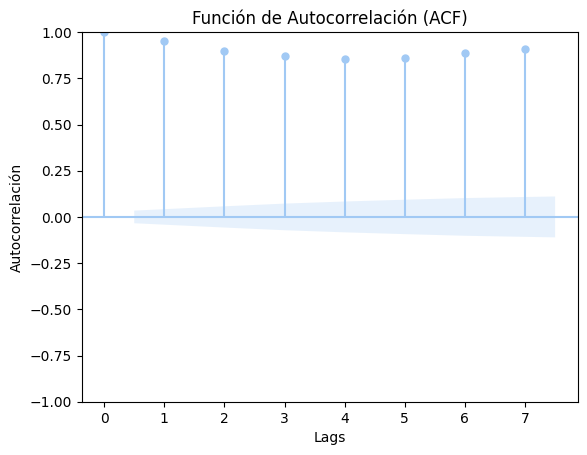

In [109]:
# Se crea una gráfica de tamaño (10,6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Electricidad (kW)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

La autocorrelación se mantiene por encima del 75% haciendo que haya dependencia entre valores pasados y presentes.

<Figure size 1000x600 with 0 Axes>

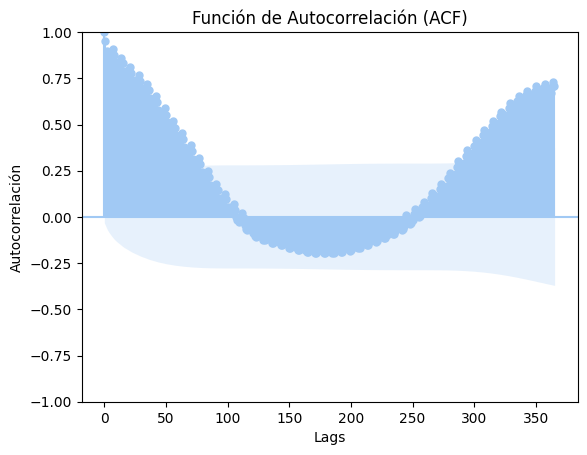

In [110]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Electricidad (kW)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Con lag=365 vemos estacionalidad.

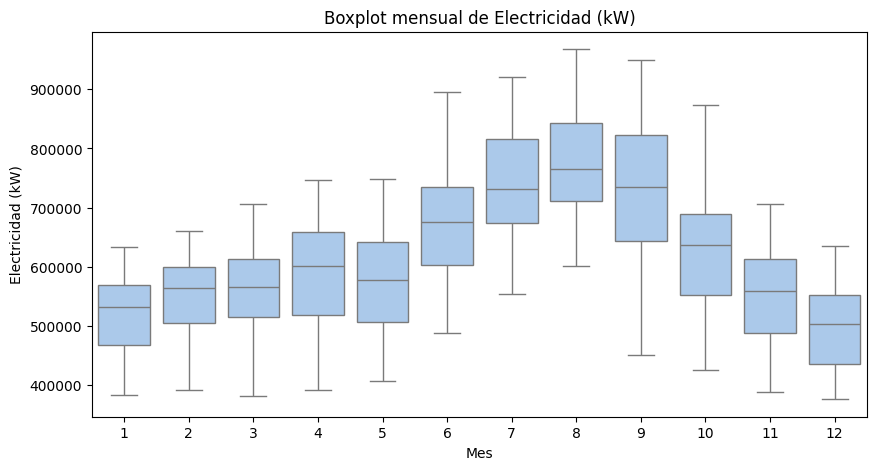

In [111]:
# Se crera una figura (10, 5)
plt.figure(figsize=(10, 5))
# Paleta de colores
sns.set_palette('pastel')

# Boxplot con el eje X los meses, e y la columna que queremos analizar
sns.boxplot(x=energia.index.month, y='Electricidad (kW)', data=energia)

# Creamos la gráfica
plt.xlabel('Mes')
plt.ylabel('Electricidad (kW)')
plt.title('Boxplot mensual de Electricidad (kW)')
plt.show()

#### Fotovoltaica (kW)

Realizamos el histograma para ver como están distribuidos los datos.

In [ ]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia['Fotovoltaica (kW)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores 60000 y 140000, haciendo que la mayor parte de Fotovoltaica (kW) esté entre la parte mediana inferior y superior del histograma, haciendo que haya una cola hacia la izquierda y por lo tanto, un sesgo negativo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante ancha.

Ahora vamos a revisar el los componentes de la variable.

In [ ]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia['Fotovoltaica (kW)'], model='additive', period=365)
# Se imprime con un tamaño (16,12)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Elegimos el periodo anual porque podemos ver bien la tendencia, la estacionalidad y el ruido.

In [ ]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad anual, podemos ver un ascenso desde 2014 hasta 2016, un descenso hasta 2018, un ascenso hasta 2020, y luego un fuerte descenso.

In [ ]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual podemos ver cómo existe una estacionalidad, por lo que el patrón se repetirá periódicamente.

In [ ]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, podemos ver como no hay una tendencia, no hay estacionalidad, la gráfica ronda el 0, no hay outliers y hay menos ruido al principio que al final.

In [ ]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia['Fotovoltaica (kW)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

0.016914 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

Por lo tanto decidimos no transformar nuestra serie temporal.

In [ ]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Fotovoltaica (kW)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

En cuanto a la autocorrelación, podemos ver como hay una correlación mayor del 60% por lo que hay una fuerte dependencia entre valores pasados y presentes.

In [ ]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Fotovoltaica (kW)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Vemos que hay estacionalidad con lag=365.

#### Refrigeración (kW)

Realizamos el histograma para ver como están distribuidos los datos.

In [ ]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia['Refrigeración (kW)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores 200000 y 1300000, haciendo que la mayor parte de Refrigeración (kW) esté entre la parte baja y casi superior que del histograma, haciendo haya una cola hacia la derecha y por lo tanto, un sesgo positivo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante ancha.

Ahora vamos a ver los componentes de la variable.

In [ ]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia['Refrigeración (kW)'], model='additive', period=365)
# Se imprime con un tamaño (16,12)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Con periodo anual podemos ver perfectamente la tendencia, la estacionalidad y el ruido.

In [ ]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad anual, podemos ver un ascenso desde 2014 hasta 2018, luego un descenso hasta 2020, se mantiene hasta 2021, y luego baja.

In [ ]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual podemos ver como hay una clara estacionalidad, haciéndonos saber que seguramente el patrón se repetirá periódicamente.

In [ ]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, podemos ver que en el ruido no tenemos tendencia, ni estacionalidad, ni outliers, ronda por 0 y hay un ruido más o menos estable al principio y final.

In [ ]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia['Refrigeración (kW)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

0.001560 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

Por lo tanto decidimos no transformar nuestra serie temporal.

In [ ]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Refrigeración (kW)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Parece haber una autocorrelación bastante mayor que 75%, por lo tanto, hay una fuerte dependencia entre valores pasados y presentes.

In [ ]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Refrigeración (kW)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Confirmamos la estacionalidad.

#### Calefacción (kWh)

Realizamos el histograma para ver como están distribuidos los datos.

In [ ]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia['Calefacción (kWh)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores 30000 y 50000, haciendo que la mayor parte de Calefacción (kWh) esté en la parte baja histograma, haciendo que haya una cola hacia la derecha y por lo tanto, un sesgo positivo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante estrecha, puesto que los datos están muy concentrados en una parte pequeña de la variable.

Vamos a revisar las componentes principales de la variable.

In [ ]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia['Calefacción (kWh)'], model='additive', period=365)
# Se imprime con un tamaño (16,12)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Con periodo anual podemos ver como se puede presenciar de manera clara la tendencia, estacionalidad y ruido.

In [ ]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, podemos ver como hay un ascenso desde 2014 hasta 2015, luego disminuye hasta 2017, aumenta de nuevo muy ligeramente hasta 2019, y luego baja bastante.

In [ ]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Se puede ver como hay una clara estacionalidad, haciéndonos saber que seguramente el patrón se repetirá en el futuro.

In [ ]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, podemos ver en cuánto al ruido, que no hay estacionalidad, no hay una tendencia, la gráfica ronda el 0, no hay outliers, y hay poco ruido a diferencia de otras variables, excepto al principio y al final.

In [ ]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia['Calefacción (kWh)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

0.000092 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

Por lo tanto decidimos no transformar nuestra serie temporal.

In [ ]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Calefacción (kWh)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

En cuanto a la autocorrelación podemos ver como supera el 75%, por lo tanto hay una fuerte dependencia entre valores pasados y presentes. Fijarnos también que cuanto mayor es el lag, parece que va decrementando el valor de autocorrelación.

In [ ]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Calefacción (kWh)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Confirmamos la estacionalidad.

#### Emisión (kg CO₂)

Realizamos el histograma para ver como están distribuidos los datos.

In [ ]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia['Emisión (kg CO₂)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores 450000 y 130000, haciendo que la mayor parte de Emisión (kg CO₂) esté entre la parte baja y casi superior del histograma, haciendo que haya una cola hacia la derecha y por lo tanto, un sesgo positivo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante ancha.

Ahora vamos a revisar las componentes principales de la variable.

In [ ]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia['Emisión (kg CO₂)'], model='additive', period=365)
# Se imprime con un tamaño (16,12)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Con periodo anual podemos ver claramente la tendencia, estacionalidad y ruido de la serie temporal de la variable.

In [ ]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Incremente desde 2014 hasta 2018, y luego a partir de ahí solo hay decremento.

In [ ]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Se puede ver que hay una clara estacionalidad en la serie temporal de la variable, por lo tanto, seguramente habrá una repetición del patrón en el futuro.

In [ ]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

En cuanto al ruido no vemos estacionalidad, ni tendencia, la gráfica ronda por el 0, no hay outliers y hqy más ruido al principio que al final.

In [ ]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia['Emisión (kg CO₂)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

0.001487 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

Por lo tanto decidimos no transformar nuestra serie temporal.

In [ ]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Emisión (kg CO₂)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Se puede ver en la autocorrelación, que todos los lags tienen una autocorrelación por encima del 80%, por lo tanto, hay una fuerte dependencia entre valores pasados y presentes.

In [ ]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia['Emisión (kg CO₂)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Se confirma estacionalidad.

Ahora revisaremos los boxplot de la variable.

In [ ]:
# Se crera una figura (10, 5)
plt.figure(figsize=(10, 5))
# Paleta de colores
sns.set_palette('pastel')

# Boxplot con el eje X los meses, e y la columna que queremos analizar
sns.boxplot(x=energia.index.month, y='Emisión (kg CO₂)', data=energia)

# Creamos la gráfica
plt.xlabel('Mes')
plt.ylabel('Emisión (kg CO₂)')
plt.title('Boxplot mensual de Emisión (kg CO₂)')
plt.show()

Al igual que sucede con energía total, emisión es muy parecida, muy pocos outliers y no lo suficientemente serios para eliminarlos. En verano es donde hay mayor emisión.

### Variables endógenas y exógenas

En cuanto a las variables endógenas, variables de las que dependen la variable objetivo, son las variables: Electricidad (kW), Fotovoltaica (kW), Refrigeración (kW), Calefacción (kWh) y Emisión (kg CO₂).

En cambio las variables exógenas, las cuales son variables que no dependen de las endógeneas pero que depende la variable de salida, y por lo tanto, son como variables externas al dataset, tenemos la variable Día de la semana

### Guardar dataset

In [ ]:
# energia.head()

In [ ]:
# energia.to_csv('Data/energia_preprocesada.csv')

# Datos_Climaticos

Vamos a analizar el dataset, habiendo ya analizado por encima en la sección de "Análisis de los datasets".

## Fechas perdidas

Comprobamos si tenemos fechas perdidas

In [ ]:
# Se calcula el numero de fechas desde a través de las hora
fechas_esperadas =  pd.date_range(start=climaticos.index.min(), end=climaticos.index.max(), freq='h')
# Diferencias entre la cantidad de horas que se supone que tenemos, y lo que realmente tenemos
fechas_perdidas = fechas_esperadas.difference(climaticos.index)
# Imprimir el número de horas perdidas
print(f'Número de fechas faltantes: {len(fechas_perdidas)}')
# Muestra las horas pérdidas
fechas_perdidas

Vemos como no tenemos fechas perdidas, por lo que no realizamos nada.

## Tratamiento de duplicados

Primero analizaremos si hay duplicados, y en caso de que los haya eliminarlos

In [ ]:
# Visualizamos la cantidad de duplicados del dataset
climaticos.duplicated().sum()


Vemos como tenemos 403 duplicados, pero no lo eliminamos porque de 78888 valores pueden haber alguna repetición.

In [ ]:
climaticos.index.duplicated().sum()

Vemos como no tenemos índices duplicados, por lo que no hacemos nada.

## Tratamiento de nulos

In [ ]:
# Visualizamos la cantidad de nulos que tiene el dataset
climaticos.isna().sum()

Como se puede ver hay pocos nulos: 533 en Dirección del viento, 193 en Condición meteorológica, Temperatura (°C), Punto de rocío (°C), Humedad (%), Velocidad del viento (m/s), Ráfaga de viento (m/s), Presión (hPa) y Precipitación (mm) 187 nulos. Por lo tanto, podríamos eliminarlos o imputarlos, en nuestro caso, como no queremos eliminar ya que no queremos perder datos, decidimos imputar, para ello analizamos cómo funciona el dataset.

In [ ]:
# Visualizamos las 5 primeras columnas del dataset
climaticos.head()

### imputación mediante interpolación temporal

En nuestro dataset, nuestros datos están organizados por horas, por lo que pensamos aprovecharnos sobre ello. Por lo tanto, "method = time" utiliza el DatetimeIndex para estimar los valores faltantes teniendo en cuenta la distancia real entre timestamps (en este caso, horas). Viendo la documentación, vemos cómo funciona en datos diarios o con mayor resolución, por lo que es adecuado para series horarias como esta. Además, al haber pocos valores nulos, la interpolación temporal proporciona una aproximación suave y coherente sin distorsionar el comportamiento general de la serie.

In [ ]:
# Seleccionamos todas las columnas numéricas del dataset
numericas = climaticos.select_dtypes(include='number').columns
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
climaticos[numericas] = climaticos[numericas].interpolate(method='time')

Como este método solo se puede usar en columnas numéricas, seleccionamos esas columnas y realizamos la operación, dejandonos que sólo nos queden nulos en las dos variables de tipo object, en las cuales debemos utilizar un método diferente.

In [ ]:
# Visualizamos la cantidad de nulos que tiene el dataset
climaticos.isna().sum()

Podemos ver que aun hay 1205 nulos en Dirección del viento y 866 nulos en Condición meteorológica. Que esto sucede porque la interpolación temporal solo nos sirve con números, por lo tanto, para tratar a los objects utilizaremos  el ffill() y bfill().

### imputación mediante último y siguiente valor observado.

Para los nulos en las variables "object" hemos decidido en utilizar `ffill()` y `bfill()`, ya que como cogen el valor anterior o posterior respectivamente, pensamos en utilizarlos juntos por si al aplicar uno de ellos sigue habiendo nulos según como estén distribuidos en nuestro dataset. Además, la dirección del viento y la condición meteorológica no son variables tan volubles que cambien fácilmente cada hora, por lo que pensamos que son los métodos adecuados para estas dos variables.

In [ ]:
# Rellenamos las columnas con el valor anterior y posterior (ffill y bfill respectivamente)
climaticos['Dirección del viento'] = climaticos['Dirección del viento'].ffill().bfill()
climaticos['Condición meteorológica'] = climaticos['Condición meteorológica'].ffill().bfill()

Con esto podemos observar cómo hemos eliminado todos los nulos de nuestro dataset.

In [ ]:
# Visualizamos la cantidad de nulos que tiene el dataset
climaticos.isna().sum()

## Outliers

Vamos a analizar si hay valores sospechosos en cada una de las variables. Primero, analizaremos los 5 primeros datos de nuestro dataset.

In [ ]:
# Visualizamos las 5 primeras columnas del dataset
climaticos.head()

De momento no parece haber nada raro, vamos a analizar con más profundidad observando las series temporales de cada variable.

In [ ]:
# Guarda el número de variables del dataset
n = len(climaticos.columns)
# Creamos las figuras y ejes con 1 columna que cada fila tendrá una variable, en figsize poniendo anchura y altura, comparten el mismo eje x
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(14, max(2, 1.6 * n)), sharex=True)
# Dibuja la serie temporal de cada columna, pone su nombre al eje y y coloca un grid
for ax, col in zip(axes, climaticos.columns):
    ax.plot(climaticos.index, climaticos[col], linewidth=1)
    ax.set_ylabel(col)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Coloca en la última gráfica el eje X
axes[-1].set_xlabel("Tiempo")
# Nombre general
fig.suptitle("Series temporales del barrio — cada serie en su propia fila", y=0.995)
# Distancia entre filas
plt.tight_layout(rect=[0, 0, 1, 0.99])
# Se muestra la gráfica
plt.show()



Temperatura (ºC) la temperatura suele estar entre 0 y 40 y pocos, con bajadas de golpe hacia alrededor de -15. Existen outliers. 

Punto de rocío (ºC) va entre alrededor de -20 a 23, en algunos puntos la variable actúa de forma extraña, dando bajones en zona muy altas, por lo que indica que también hay presencia de outliers.

Humedad (%) a simple vista no parece que haya ningún valor por debajo de 0 o mayor a 100, por lo que no consideramos que hayan outliers.

Dirección del viento, al ser una clasificación, no se nota la presencia de outliers. 

Velocidad del viento (m/s) va de 0 a 15 con picos de hasta 22 (alrededor) en algunos puntos, aunque hay picos muy altos, por el contexto de la variable consideramos que no existen outliers. 

Rafaga de viento (m/s) va desde 0 hasta 20, con picos de 23 o alrededor. Se considera que no hay outliers viendo el contexto de la variable.

Presion fija en 1000, con 2 bajones a 0. Por lo tanto existen outliers.

Precipitacion aunque suele estar en 0, tiene picos muy altos hasta de alrededor de 20 o más, pero leyendo el contexto de la variable, no consideramos que existan outliers.

Condicion meteorologica, como sucedia en direccion del viento al ser una variable de clasificación no contiene outliers.

### Temperatura (°C)

Vamos a analizar la variable.

In [ ]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(climaticos['Temperatura (°C)'].describe())

Aquí parece ser normal, puesto que hayan temperaturas entre -18ºC y 49ºC podrían ser normales. Por lo tanto, para esta variable, analizaremos los outliers desde su gráfica.

In [ ]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(climaticos.index, climaticos['Temperatura (°C)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Temperatura (°C)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Temperatura (°C)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Aquí se destacan bastante los outliers, puesto que la forma de la gráfica no suele bajar demasiado de 0 o incluso parece que -1ºC, por lo tanto solo detectaremos los valores que tengan menos de -10ºC, puesto que son picos muy notorios hacia abajo, por lo tanto esta temperatura no tiene sentido en la zona donde analiza el dataset del problema.

In [ ]:
# Elimina todos los valores por debajo de -10ºC
climaticos['Temperatura (°C)'] = climaticos['Temperatura (°C)'].where((climaticos['Temperatura (°C)'] >= -10)
)

Comprobamos cuántos outliers hemos eliminado.

In [ ]:
# Visualizamos la cantidad de nulos que tiene el dataset
climaticos.isna().sum()

Vemos cómo hemos eliminado 15 outliers, vamos a imputar con intepolación temporal

In [ ]:
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
climaticos['Temperatura (°C)'] = climaticos['Temperatura (°C)'].interpolate(method='time')

Vemos cómo queda el dataset.

In [ ]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
climaticos['Temperatura (°C)'].describe()

Hemos imputados todos los nulos y sus valores parecen haber quedado bien. Vamos a revisar de nuevo la gráfica de su serie temporal.

In [ ]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(climaticos.index, climaticos['Temperatura (°C)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Temperatura (°C)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Temperatura (°C)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Podemos ver que aún hay un outlier que baja demasiado, por lo tanto vamos a eliminarlo de la misma manera, pero esta vez vamos a poner todo lo que sea menos de -2 grados.

In [ ]:
# Elimina todos los valores por debajo de -2ºC
climaticos['Temperatura (°C)'] = climaticos['Temperatura (°C)'].where((climaticos['Temperatura (°C)'] >= -2)
)

Vamos a comprobar que lo hemos eliminado.

In [ ]:
# Visualizamos la cantidad de nulos que tiene el dataset
climaticos.isna().sum()

Efectivamente, lo hemos eliminado poniendolo a nulo.

In [ ]:
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
climaticos['Temperatura (°C)'] = climaticos['Temperatura (°C)'].interpolate(method='time')

Realizamos el interpolado temrporal.

In [ ]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
climaticos['Temperatura (°C)'].describe()

Los nulos han sido tratados.

In [ ]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(climaticos.index, climaticos['Temperatura (°C)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Temperatura (°C)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Temperatura (°C)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Hemos logrado reducir el outlier pero no eliminarlo del todo.

### Punto de rocío (°C)

Vamos a analizar esta variable.

In [ ]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(climaticos['Punto de rocío (°C)'].describe())

Vemos, al igual que paso con la anterior variable, los valores de esta variable parecen normales, vamos a analizar la gráfica.

In [ ]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(climaticos.index, climaticos['Punto de rocío (°C)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Punto de rocío (°C)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Punto de rocío (°C)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Vemos que aunque haya algun bajon, parece que es el funcionamiento típico de la variable, por lo tanto lo identificamos como que esta variable no contiene outliers.

### Humedad (%)

Vamos a analizar esta variable.

In [ ]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(climaticos['Humedad (%)'].describe())

Vemos que los valores de humedad de forma porcentual son lógicos, por lo que vamos a visualizar la gráfica de su serie temporal.

In [ ]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(climaticos.index, climaticos['Humedad (%)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Humedad (%)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Humedad (%)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Vemos en su serie tempora, cómo aquí parece que tampoco hay outliers, ya que no se ve un funcionamiento raro en ningún lado.

### Velocidad del viento (m/s)

Vamos a analizar esta variable.

In [ ]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(climaticos['Velocidad del viento (m/s)'].describe())

Se puede ver, que aunque por encima del 75% se dispara, no parece valores exagerados, por lo que vamos a analizar su serie temporal en la gráfica.

In [ ]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(climaticos.index, climaticos['Velocidad del viento (m/s)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Velocidad del viento (m/s)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Velocidad del viento (m/s)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Aquí se ve qué aunque hay subidas muy altas de viento, puede ser lógicas debido a borrascas, rachas de viento entre otras cosas (contexto de la variable) por lo que consideramos que no contiene outliers.

### Ráfaga de viento (m/s)

Vamos a analizar esta variable.

In [ ]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(climaticos['Ráfaga de viento (m/s)'].describe())

Puesto que la propia variable indica que son ráfagas, se puede ver como gran parte de los valores están situados en 0 y hay un valor máximo dentro de la lógica del contexto de la variable, por lo que no parecen haber outliers, vamos a analizar su serie temporal en una gráfica.

In [ ]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(climaticos.index, climaticos['Ráfaga de viento (m/s)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Ráfaga de viento (m/s)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Ráfaga de viento (m/s)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Cómo hemos descrito antes, al ser ráfagas, los valores estaran en 0 y habrán picos hacia arriba, que encima no son exagerados, por lo tanto lo consideramos normales dentro del contexto de la variable y decidimos no eliminar nada, puesto que no vemos outliers.

### Presión (hPa)

Vamos a analizar la variable.

In [ ]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(climaticos['Presión (hPa)'].describe())

Por lo tanto decidimos eliminar únicamente las variables que bajen de 900 (hPa) de presión

In [ ]:
# Sustituimos los valores encima del 75% por nulos
climaticos['Presión (hPa)'] = climaticos['Presión (hPa)'].where((climaticos['Presión (hPa)'] >= 900)
)

Revisamos cuántos outliers hemos eliminado.

In [ ]:
# Visualizamos la cantidad de nulos que tiene el dataset
climaticos.isna().sum()

Vemos como hemos eliminado 3 outliers. Ahora imputaremos a través de interpolación temporal.

In [ ]:
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
climaticos['Presión (hPa)'] = climaticos['Presión (hPa)'].interpolate(method='time')

Revisamos de nuevo la variable.

In [ ]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
climaticos['Presión (hPa)'].describe()

Se puede ver como ya no existen nulos ni valores extraños.

In [ ]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(climaticos.index, climaticos['Presión (hPa)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Presión (hPa)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Presión (hPa)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Se puede ver en la gráfica como ya se muestra la serie temporal de la variable sin problemas.

### Precipitación (mm)

Vamos a analizar esta variable.

In [ ]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(climaticos['Precipitación (mm)'].describe())

Se puede ver cómo gran parte de los valores están en 0, rasgo característico de zonas muy poco lluviosas, por lo que los valores que están fuera de ellos son valores normales de que hay precipitación por lo tanto no lo consideramos outliers. Ahora vamos a revisar su serie temporal en la gráfica.

In [ ]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(climaticos.index, climaticos['Precipitación (mm)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Precipitación (mm)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Precipitación (mm)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Aquí se puede ver cómo efectivamente, su serie temporal demuestra el tiempo donde ha habido lluvia con precipitaciones dentro de valores razonables, por lo tanto no consideramos que esta variable tenga outliers.

## Transformación de variables categóricas a numéricas

Transformemos "Dirección del viento" y "Condición meteorológica" de object a numéricas, ya que nos resultarán mucho más útil para nuestros modelos que estén en numéricas.

In [ ]:
#Seleccionamos las columnas categóricas y las mostramos
categoricas = climaticos.select_dtypes(include = ["object"]).columns
categoricas

Seleccionamos las variables categoricas.

In [ ]:
#Transformamos las categóricas a dummies, eliminando la primera columna de cada variable categórica, haciendo que desaparezca la colinealidad, combinación lineal de varias columnas para formar otra.
categoricas_Datos = pd.get_dummies(climaticos[categoricas], drop_first = True)
# Mostramos la transformación de las variables categóricas en variables dummies
categoricas_Datos.head()

Creamos las dummies de las variables categóricas, eliminando la primera columna.

In [ ]:
# Eliminamos los atributos originales
climaticos.drop(categoricas, axis = 1, inplace = True)
# Concatenamos los nuevos atributos creados para las variables categóricas
climaticos = pd.concat([climaticos, categoricas_Datos], axis = 1)
# Mostramos como quedan los datos de nuevo
climaticos.head()

Revisamos que, efectivamente, tenemos todas las columnas juntas.

## Unir datasets

Puesto que la variable objetivo es Energia_total que pertenece al otro dataset los uniremos ya que no resultará útil para medir las correlaciones entre variables.

In [ ]:
# Unimos dos datasets con el mismo DatetimeIndex, eliminando una columna compartida
energia_climaticos = energia_horas.join(climaticos.drop(columns='Día de la semana'), how='outer')

In [ ]:
# Información del dataset
energia_climaticos.info()

Podemos ver que al juntar las 7 columnas del dataset de energía y las 40 variables de climáticos (41, pero eliminamos la columna repetida) tenemos un nuevo dataset, el cual, es muy grande, así que vamos a mirar sus correlaciones para ir eliminando variables (excepto "Día de la semana").

## Tabla de correlación

Ahora vamos a estudiar las correlaciones del dataset.

En primer lugar vamos a revisar la varianza.

In [ ]:
# Calcular varianza de todas las columnas numéricas
varianza = energia_climaticos.var()
varianza


Podemos ver que hay demasiadas columnas y no se puede visualizar bien la varianza en este dataset, por lo tanto, lo tratamos haciendo un filtro de todos las variables que tengan una varianza menor que 1 (próximas a 0).

In [ ]:
# Seleccionamos las variables con varianza menor a 1
varianza_baja = varianza[varianza < 1]
# Ordenamos las variables de menor a mayor
varianza_baja = varianza_baja.sort_values()
# Imprimimos
varianza_baja


Podemos ver las variables que nos salen:

Condición meteorológica_Smoke                   0.000025

Condición meteorológica_Squalls                 0.000038

Condición meteorológica_Duststorm               0.000038

Condición meteorológica_Widespread              0.000063

Condición meteorológica_Niebla                  0.000165

Condición meteorológica_Patches                 0.000241

Condición meteorológica_Neblina                 0.000342

Condición meteorológica_Heavy                   0.000507

Condición meteorológica_T-Storm                 0.000570

Condición meteorológica_Lluvia                  0.001127

Condición meteorológica_Thunder                 0.001835

Dirección del viento_NNE                        0.009255

Condición meteorológica_Light                   0.009976

Dirección del viento_NE                         0.013207

Dirección del viento_N                          0.017261

Dirección del viento_NNO                        0.018153

Dirección del viento_SSO                        0.021473

Dirección del viento_SSE                        0.028138

Dirección del viento_NO                         0.028437

Dirección del viento_S                          0.028962

Dirección del viento_ENE                        0.033539

Dirección del viento_SE                         0.045621

Dirección del viento_ONO                        0.046251

Dirección del viento_SO                         0.047736

Dirección del viento_VAR                        0.061253

Dirección del viento_OSO                        0.065796

Condición meteorológica_Nublado                 0.068604

Dirección del viento_ESE                        0.083116

Dirección del viento_O                          0.098063

Precipitación (mm)                              0.110069

Dirección del viento_E                          0.142170

Condición meteorológica_Parcialmente_nublado    0.143531

Condición meteorológica_Mayormente_nublado      0.184579

Condición meteorológica_Despejado               0.249947

dtype: float64

La variable con varianza más alta de este filtro es "Condición meteorológica_Despejado" que sigue siendo una variable muy próxima a 0, por lo tanto, eliminaremos todas las variables del listado del filtro. Además, "Dirección del viento" y "Condición meteorológica" no veo que nos puedan aportar mucho a nuestro objetivo de "energía total" ya que la dirección del viento no consumirá más energía, y condición meteorológica sólo podría influir poco, como podría ser que se enciendan algunas luces en días nublados o ninguna luz en día despejado, por lo tanto también lo eliminamos. Fijarnos también que "Día de la semana" tampoco esté en la lista, ya que no queremos eliminarla.

In [ ]:
energia_climaticos = energia_climaticos.drop(columns=varianza_baja.index)
energia_climaticos

Podemos ver como nos hemos quedado con 13 variables de 47 que teníamos, por lo tanto, nos hemos desecho de 34 variables, de las cuales destacamos todas las variable dummies de "Dirección del viento" y "Condición meteorológica". También nos hemos desecho de otra variable que no aporta mucho al dataset según su varianza: Precipitación (mm).

Ahora revisamos qué variables tienen más correlación con la variable objetivo "Energía total (kWh)"

In [ ]:
# Hacemos una matriz de correlación y visualizaremos sobre nuestra columna objetivo cuáles columnas parecen ser la más influyentes 
matriz_correlacion = energia_climaticos.corr()
# Visualizaremos de mayor a menor
matriz_correlacion["Energía total (kWh)"].sort_values(ascending=False)

Como se puede ver, aparte de "Día de la semana", todas las variables aportan al dataset, y como hemos dicho varias veces, no eliminamos "Día de la semana" porque es una variable exógena que nos aportará a los modelos cuando traten al dataset.

Por último, vamos a revisar la matriz de correlación.

In [ ]:
# Crear la tabla de correlación
correlation_matrix = energia_climaticos.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

A diferencia de la última vez, como tenemos 13 variables y "Emisión (kg CO₂)" no la eliminábamos porque teníamos muy pocas variables, aquí decidimos eliminarla y así no tratamos con el riesgo de multicolinealidad.

In [ ]:
energia_climaticos = energia_climaticos.drop('Emisión (kg CO₂)', axis=1)
energia_climaticos.info()

## Transformacion a días

Ante la gran cantidad de datos y que nuestro dataset no tiene mucho sentido que tenga los datos en formato horario, decidimos cambiarlo a que sean diarios. Para ello, hacemos un resample diario que sume todos los datos de cada dia, pero teniendo en cuenta que "Día de la semana" no queremos que cambie, y como cada fila es la suma de si mismo 24 veces, decidimos hacer una división de 24 y transformarlo en entero.

In [ ]:
# Guardamos una copia
energia_climaticos_horas = energia_climaticos

# Aquí pondremos todas las variables que les haremos un resample a través de la suma para transformarlas a diarias
columnas_suma = ['Día de la semana','Electricidad (kW)', 'Fotovoltaica (kW)', 'Refrigeración (kW)', 'Calefacción (kWh)', 'Energía total (kWh)']

# Aquí pondremos todas las variables que les haremos un resample a través de la media para transformarlas a diarias
columnas_media = ['Temperatura (°C)', 'Punto de rocío (°C)', 'Humedad (%)', 'Velocidad del viento (m/s)', 'Presión (hPa)']

# Aquí pondremos todas las variables que les haremos un resample a través del máximo para transformarlas a diarias
columnas_maximo = ['Ráfaga de viento (m/s)']

# Cambia frecuencia temporal a diaria a través de la suma
energia_climaticos_suma = energia_climaticos[columnas_suma].resample('D').sum()

# Cambia frecuencia temporal a diaria a través de la suma
energia_climaticos_media = energia_climaticos[columnas_media].resample('D').mean()

# Cambia frecuencia temporal a diaria a través de la suma
energia_climaticos_maximo = energia_climaticos[columnas_maximo].resample('D').max()

# Unimos los 3 dataframes con frecuencia diaria, unidos a través del índice temporal
energia_climaticos = energia_climaticos_suma.join(energia_climaticos_media).join(energia_climaticos_maximo)

# Divide entre 24 los datos de la variable
energia_climaticos['Día de la semana'] = energia_climaticos['Día de la semana']/24

# Transforma a entero la variable
energia_climaticos['Día de la semana'] = energia_climaticos['Día de la semana'].astype(int)

Revisamos como han quedado las 10 primeras filas.

In [ ]:
# Visualizamos las 5 primeras columnas del dataset
energia_climaticos.head(10)

Revisamos como ha quedado nuestro dataset en general.

In [ ]:
# Información del dataset
energia_climaticos.info()

Vemos como nuestro dataset ha pasado de 78888 a 3287 entradas (78888/24) y todo lo demás queda igual.

## Análisis de las variables

Hay que tener en cuenta que aunque varias partes de los análisis de las variables tengamos que ir cambiando granularidad (para que se vea más suavizadas las lineas temporales de las variables y podamos interpretarlas com mayor sencillez), siempre tendremos frecuencia diaria en nuestro dataset, y esto no cambiará.

Vamos a analizar sobre nuestra variable objetivo, sobre su tendencia, estacionalidad, ruido, estacionariedad y autocorrelación.

### Temperatura (°C)

Realizamos el histograma para ver como están distribuidos los datos.

In [ ]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia_climaticos['Temperatura (°C)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores 13 y 37, haciendo que la mayor parte de Temperatura (°C) esté entre la parte superior derecha y mediana inferior del histograma, haciendo que haya una cola hacia la izquierda y por lo tanto, un sesgo negativo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante ancha.

Ahora vamos a revisar el resto de componentes de la variable.

In [ ]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia_climaticos['Temperatura (°C)'], model='additive', period=365)
# Se imprime con un tamaño (16,12)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Establecemos un periodo anual porque es donde podemos ver bien la tendencia, estacionalidad y ruido de forma aceptable.

In [ ]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').mean()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
ax.set_ylim(23, 26)
plt.show()

Con granularidad anual a partir de la media, podemos ver como hay una descendencia desde 2014 hasta 2016, hay un aumento ligero hasta 2017, luego un descenso hasta 2019, asciende de nuevo hasta 2020, baja hasta 2021, y luego asciende.

In [ ]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual podemos ver como hay estacionalidad de forma clara, por lo que seguramente se repetirá el patrón en el futuro.

In [ ]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, en cuanto al ruido, ronda alrededor de 0, no parece haber estacionalidad, ni outliers ni tendencia, y al principio de la gráfica hay más ruido que al final.

In [ ]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia_climaticos['Temperatura (°C)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

0.011271 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

Por lo tanto decidimos no transformar nuestra serie temporal.

In [ ]:
# Se crea una gráfica de tamaño (10,6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Temperatura (°C)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

La autocorrelación se mantiene por encima del 75% haciendo que haya dependencia entre valores pasados y presentes.

In [ ]:
# Se crea una gráfica de tamaño (10,6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Temperatura (°C)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Con lag=365 vemos estacionalidad.

Vamos a analizar los boxplot de la variable.

In [ ]:
# Se crera una figura (10, 5)
plt.figure(figsize=(10, 5))
# Paleta de colores
sns.set_palette('pastel')

# Boxplot con el eje X los meses, e y la columna que queremos analizar
sns.boxplot(x=energia_climaticos.index.month, y='Temperatura (°C)', data=energia_climaticos)

# Creamos la gráfica
plt.xlabel('Mes')
plt.ylabel('Temperatura (°C)')
plt.title('Boxplot mensual de Temperatura (°C)')
plt.show()

Hay pocos outliers y los pocos que hay no son serios, por lo que no los eliminamos. También podemos ver como es lógico, la temperatura alcanza sus mínimos en invierno y sus máximos en verano.

### Punto de rocío (°C)

Realizamos el histograma para ver como están distribuidos los datos.

In [ ]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia_climaticos['Punto de rocío (°C)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores -8 y 18, haciendo que la mayor parte de Punto de rocío (°C) esté entre la parte mediana baja y superior del histograma, haciendo que haya una cola hacia la izquierda y por lo tanto, un sesgo negativo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante ancha.

Ahora vamos a revisar el resto de componentes de la variable.

In [ ]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia_climaticos['Punto de rocío (°C)'], model='additive', period=365)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Establecemos un periodo anual porque es donde podemos ver bien la tendencia, estacionalidad y ruido de forma aceptable.

In [ ]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').mean()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad anual y la media, vemos en la tendencia un ascenso desde 2014 a 2015, desciende hasta el 2017, asciende hasta 2019, desciende hasta 2020, sube ligeramente hasta 2022.

In [ ]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual podemos ver como hay estacionalidad de forma clara, por lo que seguramente se repetirá el patrón en el futuro.

In [ ]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, en cuanto al ruido, ronda alrededor de 0, no parece haber estacionalidad, ni outliers ni tendencia, y al principio de la gráfica hay más ruido que al final.

In [ ]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia_climaticos['Punto de rocío (°C)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

0.000051 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

Por lo tanto decidimos no transformar nuestra serie temporal.

In [ ]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Punto de rocío (°C)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

La autocorrelación se mantiene por encima del 50% haciendo que haya dependencia entre valores pasados y presentes.

In [ ]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Punto de rocío (°C)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Con lag=365 vemos estacionalidad.

Vamos a analizar los boxplot de la variable.

In [ ]:
# Se crera una figura (10, 5)
plt.figure(figsize=(10, 5))
# Paleta de colores
sns.set_palette('pastel')

# Boxplot con el eje X los meses, e y la columna que queremos analizar
sns.boxplot(x=energia_climaticos.index.month, y='Punto de rocío (°C)', data=energia_climaticos)

# Creamos la gráfica
plt.xlabel('Mes')
plt.ylabel('Punto de rocío (°C)')
plt.title('Boxplot mensual de Punto de rocío (°C)')
plt.show()

Podemos ver poco outliers y los poco que hay no son grandes. También vemos que el punto de rocío crece durante el verano y empequeñece en invierno.

### Humedad (%)

Realizamos el histograma para ver como están distribuidos los datos.

In [ ]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia_climaticos['Humedad (%)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores 10 y 50, haciendo que la mayor parte de Humedad (%) esté entre la parte inferior y mediana inferior del histograma, haciendo que haya una cola hacia la derecja y por lo tanto, un sesgo positivo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante ancha.

Ahora vamos a revisar el resto de componentes de la variable.

In [ ]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia_climaticos['Humedad (%)'], model='additive', period=365)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Establecemos un periodo anual porque es donde podemos ver bien la tendencia, estacionalidad y ruido de forma aceptable.

In [ ]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').mean()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
ax.set_ylim(25, 35)
plt.show()

Con granularidad anual, vemos en la tendencia un ascenso desde 2014 a 2015, desciende hasta el 2017, asciende hasta 2019, desciende hasta 2020, sube hasta 2022.

In [ ]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual podemos ver como hay estacionalidad de forma clara, por lo que seguramente se repetirá el patrón en el futuro.

In [ ]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, en cuanto al ruido, ronda alrededor de 0, no parece haber estacionalidad, ni outliers ni tendencia, y al principio de la gráfica hay más ruido que al final.

In [ ]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia_climaticos['Humedad (%)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

0.000031 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

Por lo tanto decidimos no transformar nuestra serie temporal.

In [ ]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Humedad (%)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

La autocorrelación se mantiene por encima del 50% haciendo que haya dependencia entre valores pasados y presentes.

In [ ]:
# Se crea una gráfica de tamaño (10, 6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Humedad (%)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Con lag=365 vemos estacionalidad.

Vamos a analizar los boxplot de la variable.

In [ ]:
# Se crera una figura (10, 5)
plt.figure(figsize=(10, 5))
# Paleta de colores
sns.set_palette('pastel')

# Boxplot con el eje X los meses, e y la columna que queremos analizar
sns.boxplot(x=energia_climaticos.index.month, y='Humedad (%)', data=energia_climaticos)

# Creamos la gráfica
plt.xlabel('Mes')
plt.ylabel('Humedad (%)')
plt.title('Boxplot mensual de Humedad (%)')
plt.show()

En el caso de la humedad, no consideramos que hayan outliers serios, por lo que no eliminamos nada. También se ve que en diciembre, enero y febrero parece ser los meses donde hay mayor humedad.

### Velocidad del viento (m/s)

Realizamos el histograma para ver como están distribuidos los datos.

In [ ]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia_climaticos['Velocidad del viento (m/s)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores 1 y 4.5, haciendo que la mayor parte de Velocidad del viento (m/s) esté entre la parte inferior y mediana inferior del histograma, haciendo que haya una cola hacia la derecha y por lo tanto, un sesgo positivo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante ancha.

Ahora vamos a revisar el resto de componentes de la variable.

In [ ]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia_climaticos['Velocidad del viento (m/s)'], model='additive', period=365)
# Se imprime con un tamaño (16,12)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Establecemos un periodo anual porque es donde podemos ver bien la tendencia, estacionalidad y ruido de forma aceptable.

In [ ]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').mean()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
ax.set_ylim(2.8, 3.0)
plt.show()

Con granularidad anual y la media, podemos ver como hay una ascendencia desde 2014 hasta 2016, desciende hasta 2018, asciende hasta 2019, desciende hasta 2020, aumenta hasta 2022.

In [ ]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual podemos ver como hay estacionalidad de forma clara, por lo que seguramente se repetirá el patrón en el futuro.

In [ ]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, en cuanto al ruido, ronda alrededor de 0, no parece haber estacionalidad, ni outliers ni tendencia, y al principio de la gráfica hay más ruido que al final.

In [ ]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia_climaticos['Velocidad del viento (m/s)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

0.000335 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

Por lo tanto decidimos no transformar nuestra serie temporal.

In [ ]:
# Se crea una gráfica de tamaño (10,6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Velocidad del viento (m/s)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

La correlación se puede ver como en los lags 2 (40-45%) y 3 (20-25%) parece haber un bajón en la correlación, aunque luego esta última, se mantiene hasta la 7, por lo que la dependencia entre valores pasados y presentes es bastante floja, a diferencia del resto de variables que hemos ido mirando durante el notebook.

In [ ]:
# Se crea una gráfica de tamaño (10,6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Velocidad del viento (m/s)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Con lag=365 vemos estacionalidad.

Visto que esta variable no vemos que influya directamente en nuestro consumo de energía total, y la baja autocorrelación que hay entre valores pasados y presentes, la trataremos como variable exógena.

Vamos a ver los boxplot de la variable.

In [ ]:
# Se crera una figura (10, 5)
plt.figure(figsize=(10, 5))
# Paleta de colores
sns.set_palette('pastel')

# Boxplot con el eje X los meses, e y la columna que queremos analizar
sns.boxplot(x=energia_climaticos.index.month, y='Velocidad del viento (m/s)', data=energia_climaticos)

# Creamos la gráfica
plt.xlabel('Mes')
plt.ylabel('Velocidad del viento (m/s)')
plt.title('Boxplot mensual de Velocidad del viento (m/s)')
plt.show()

Los outliers que aparecen no son serios por lo que no eliminamos nada. Además, vemos como la velocidad del viento crece en verano y disminuye en invierno.

### Presión (hPa)

Realizamos el histograma para ver como están distribuidos los datos.

In [ ]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia_climaticos['Presión (hPa)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede ver como gran parte de los datos están situados entre los valores 967 y 978, haciendo que la mayor parte de Presión (hPa) esté entre la parte inferior y mediana superior del histograma, haciendo que haya una cola hacia la derecha y por lo tanto, un sesgo positivo, que implica que no es una distribución normal. Vemos también como la distribución de los datos parece ser bastante ancha.

Ahora vamos a revisar el resto de componentes de la variable.

In [ ]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia_climaticos['Presión (hPa)'], model='additive', period=365)
# Se imprime con un tamaño (16,12)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Establecemos un periodo anual porque es donde podemos ver bien la tendencia, estacionalidad y ruido de forma aceptable.

In [ ]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').mean()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
ax.set_ylim(972, 973)
plt.show()

Con granularidad anual y media, podemos ver un descenso desde 2014 hasta 2015, asciende hasta 2016, desciende hasta 2017, asciende hasta 2018, desciende hasta 2020, y asciende hasta 2022.

In [ ]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual podemos ver como hay estacionalidad de forma clara, por lo que seguramente se repetirá el patrón en el futuro.

In [ ]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, en cuanto al ruido, ronda alrededor de 0, no parece haber estacionalidad, ni outliers ni tendencia, y al principio de la gráfica hay más ruido que al final.

In [ ]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia_climaticos['Presión (hPa)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

0.000101 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

Por lo tanto decidimos no transformar nuestra serie temporal.

In [ ]:
# Se crea una gráfica de tamaño (10,6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Presión (hPa)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

La correlación se puede ver como en los lags 2 y 3 parece haber un bajón en la correlación, aunque luego esta última, se mantiene hasta la 7, por lo que la dependencia entre valores pasados y presentes es bastante floja, como sucedía en la variable Velocidad del viento (m/s).

In [ ]:
# Se crea una gráfica de tamaño (10,6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Presión (hPa)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Con lag=365 vemos estacionalidad.

Vamos a analizar los boxplot de la variable.

In [ ]:
# Se crera una figura (10, 5)
plt.figure(figsize=(10, 5))
# Paleta de colores
sns.set_palette('pastel')

# Boxplot con el eje X los meses, e y la columna que queremos analizar
sns.boxplot(x=energia_climaticos.index.month, y='Presión (hPa)', data=energia_climaticos)

# Creamos la gráfica
plt.xlabel('Mes')
plt.ylabel('Presión (hPa)')
plt.title('Boxplot mensual de Presión (hPa)')
plt.show()

al ser un rango de valores bajo y con sentido, no tratamos con estos outliers. También se puede ver, que la presión es más grande en invierno que en verano.

### Ráfaga de viento (m/s)

Realizamos el histograma para ver como están distribuidos los datos.

In [ ]:
# Creamos un histograma de tamaño (8,4) dividiéndolo en 60 intervalos
energia_climaticos['Ráfaga de viento (m/s)'].hist(bins=60, figsize=(8,4))
plt.show()

Se puede observar, a diferencia del resto de variables analizadas hasta ahora, que una gran parte de los valores se concentra en 0, ya que este corresponde a su comportamiento habitual. A partir del intervalo entre 5 y 10 m/s comienzan a aparecer datos, disminuyendo progresivamente su frecuencia en los tramos de 10 a 15 m/s y de 15 a 20 m/s, siendo prácticamente inexistentes en el intervalo entre 20 y 25 m/s.

Esta distribución presenta una cola hacia la derecha, lo que indica un sesgo positivo acusado y, por tanto, una clara desviación respecto a una distribución normal. Este comportamiento es característico de variables asociadas a eventos poco frecuentes pero de elevada intensidad.

Ahora vamos a revisar el resto de componentes de la variable.

In [ ]:
# Descompone la serie temporal de la variable en sus 3 componentes principales: tendencia, estacionalidad y ruido
resultado = seasonal_decompose(energia_climaticos['Ráfaga de viento (m/s)'], model='additive', period=365)
# Se imprime con un tamaño (16,12)
fig = resultado.plot()
fig.set_size_inches((16,12))
plt.show()

Establecemos un periodo anual porque es donde podemos ver bien la tendencia, estacionalidad y ruido de forma aceptable.

In [ ]:
# Reduce granularidad a años, sumando los valores
trend = resultado.trend.resample('YE').max()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
trend.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
ax.set_ylim(5, 8)
plt.show()

Con granularidad anual, podemos ver como hay una ascendencia desde 2014 hasta 2016, descenso hasta 2017, ascenso hasta 2018, se mantiene hasta 2019, desciende hasta 2020, asciende hasta 2022.

In [ ]:
# Reduce granularidad a meses, sumando los valores
seasonal = resultado.seasonal.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
seasonal.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual podemos ver como hay estacionalidad de forma clara, por lo que seguramente se repetirá el patrón en el futuro.

In [ ]:
# Reduce granularidad a meses, sumando los valores
resid = resultado.resid.resample('ME').sum()

# Imprimimos con un tamaño (16,4)
fig, ax = plt.subplots(figsize=(16,4))
resid.plot(ax=ax, color='blue', linewidth=1)
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)
plt.show()

Con granularidad mensual, en cuanto al ruido, ronda alrededor de 0, no parece haber estacionalidad, ni outliers ni tendencia, y al principio de la gráfica hay más ruido que al final.

In [ ]:
# Se aplica el test ADF (Augmented Dickey-Fuller) para comprobar la estacionariedad de la serie temporal de la variable
result = adfuller(energia_climaticos['Ráfaga de viento (m/s)'])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

0.000776 < 0.05 Por lo que se rechaza la hipótesis nula, por lo tanto es estacionaria, es decir, la varianza y la media son constantes y la estructura temporal se mantiene.

Por lo tanto decidimos no transformar nuestra serie temporal.

In [ ]:
# Se crea una gráfica de tamaño (10,6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Ráfaga de viento (m/s)'], lags=7)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

en la correlación se puede ver como en el lag 2 hay un decremento enorme del 100% a 30-35%, en el lag 3 baja hasta 25-30%, y luego se mantiene estos lags, lo que indica una dependencia entre valores pasados y presentes bastante floja.

In [ ]:
# Se crea una gráfica de tamaño (10,6)
plt.figure(figsize=(10, 6))
# Se representa la función de autocorrelación (ACF) de la serie temporal de temperatura dependiente de los lags establecidos
sm.graphics.tsa.plot_acf(energia_climaticos['Ráfaga de viento (m/s)'], lags=365)
plt.title('Función de Autocorrelación (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Con lag=365 vemos estacionalidad.

Visto que esta variable no vemos que influya directamente en nuestro consumo de energía total, y la baja autocorrelación que hay entre valores pasados y presentes, la trataremos como variable exógena.

Ahora vamos a analizar los boxplot de la variable.

In [ ]:
# Se crera una figura (10, 5)
plt.figure(figsize=(10, 5))
# Paleta de colores
sns.set_palette('pastel')

# Boxplot con el eje X los meses, e y la columna que queremos analizar
sns.boxplot(x=energia_climaticos.index.month, y='Ráfaga de viento (m/s)', data=energia_climaticos)

# Creamos la gráfica
plt.xlabel('Mes')
plt.ylabel('Ráfaga de viento (m/s)')
plt.title('Boxplot mensual de Ráfaga de viento (m/s)')
plt.show()

En cuanto a esta variable, aunque parezcan haber muchos "outliers", en realidad no tiene "outliers", ya que es una variable que normalmente estará a 0 y queremos saber cuando hay una diferencia en la variable, por lo que esos "outliers" son los valores que más queremos de la variable. También se puede ver, como en Febrero, Marzo, Abril, Agosto, Septiembre y Octubre son los meses con mayor fuerza de ráfagas de viento.

## Variables endógenas y exógenas

En vista al análisis, en cuanto a las variables endógenas, variables de las que dependen la variable objetivo, son las variables: Electricidad (kW), Fotovoltaica (kW), Refrigeración (kW), Calefacción (kWh), Temperatura (°C), Punto de rocío (°C), Humedad (%) y Presión (hPa).

En cuanto a las variables exógenas, tenemos: "Día de la semana", "Velocidad del viento (m/s)" y "Ráfaga de viento (m/s)".

## Guardar dataset

In [ ]:
# energia_climaticos.head()

In [ ]:
# energia_climaticos.to_csv('Data/energia_climaticos_preprocesada.csv')

# Conclusión

En cuanto a nuestro preprocesado, hemos cogido el dataset ``Datos_Energia``, hemos realizado un DatetimeIndex para tener un índice de frecuencia horaria, eliminando las columnas utilizadas para dicho índice. Eliminamos duplicados, excluyendo el índice ya que no contiene duplicados, sustituyéndolos por nulos. Luego investigamos los métodos de interpolado y nos interesó utilizar el interpolado temporal, ya que parece respetar más la serie temporal de cada variable que el interpolado lineal, por lo tanto, tratamos los nulos con interpolado temporal. Luego describimos a simple vista las series temporales de cada variable y vemos como tenemos outliers muy altos o/y muy bajos dependiendo de la variable, que tratamos con percentiles con valores muy altos o muy bajos, para eliminar (sustituir por nulos) el mínimo número de datos posible, para tratar de respetar la serie temporal lo máximo posible. Luego, analizamos sus correlaciones, pero decidimos no eliminar nada ya que el dataset tiene muy pocas variables, por lo que quisimos respetar el dataset lo máximo posible. Para finalizar, transformamos los datos a días sumando todas las horas de cada día, ya que son cantidades acumulables a lo largo del día, y guardamos el dataset con nombre ``energia_preprocesada.csv``.

En cuanto al análisis de variables, hemos visto que todas las variables que tenemos son estacionales con periodos anuales, por lo que seguramente se repetirán patrones en el futuro. Son estacionarias también todas, es decir, la varianza y la media son constantes y la estructura temporal se mantiene. Tienen una fuerte autocorreleación con lag=7, lo que nos hace ver que hay fuertes dependencias de valores del pasado y presente en el periodo de una semana. En todas las variables suelen empezar una tendencia ascendente, pero llegan un momento que descienden.

# Uso de IA

**Prompt:** pero pierde puntos del eje x, como lo hago para poner todos los meses?

**Respuesta:**
```Python
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Selección de rango
ts = energia_mensual["2014":"2015"]

# Crear la figura
fig, ax = plt.subplots(figsize=(12,4))

# Graficar línea principal
ax.plot(ts.index, ts.values, marker='o', color='blue', label='Consumo mensual')

# Resaltar el pico de cada año
for year in ts.index.year.unique():
    pico = ts[ts.index.year == year].idxmax()
    ax.scatter(pico, ts[pico], color='red', zorder=5)
    ax.text(pico, ts[pico]+0.1, str(pico.month), ha='center', color='red')

# Título y etiquetas
ax.set_title("Consumo medio mensual (2014-2015) con picos estacionales")
ax.set_xlabel("Mes")
ax.set_ylabel("Electricidad (kW)")

# Grid
ax.grid(color='gray', linestyle='--', linewidth=0.7)

# Configurar eje X para mostrar todos los meses
ax.xaxis.set_major_locator(mdates.MonthLocator())  # cada mes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotar etiquetas para que no se superpongan
plt.xticks(rotation=45)

# Leyenda
ax.legend()

plt.tight_layout()
plt.show()
```


**Prompt:** hazme una tabla de correlacion de todas las columnas de un conjunto de datos en python

**Respuesta:**
```Python
import pandas as pd

# Cargar tu conjunto de datos
# Por ejemplo, si es un CSV:
df = pd.read_csv("ruta/a/tu/archivo.csv")

# Crear la tabla de correlación
correlation_matrix = df.corr()

# Mostrar la tabla de correlación
print(correlation_matrix)

# Opcional: si quieres visualizarla de forma más atractiva con un heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()
```

**Prompot:** Hazme en una grafica donde se muestren las series temporales de todas las variables de mi dataset energia 

**Respuesta:**
```Python
# Guarda el número de variables del dataset
n = len(energia.columns)
# Creamos las figuras y ejes con 1 columna que cada fila tendrá una variable, en figsize poniendo anchura y altura, comparten el mismo eje x
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(14, max(2, 1.6 * n)), sharex=True)
# Dibuja la serie temporal de cada columna, pone su nombre al eje y y coloca un grid
for ax, col in zip(axes, energia.columns):
    ax.plot(energia.index, energia[col], linewidth=1)
    ax.set_ylabel(col)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Coloca en la última gráfica el eje X
axes[-1].set_xlabel("Tiempo")
# Nombre general
fig.suptitle("Series temporales del barrio — cada serie en su propia fila", y=0.995)
# Distancia entre filas
plt.tight_layout(rect=[0, 0, 1, 0.99])
# Se muestra la gráfica
plt.show()
```

**Prompot:** me sale raro, yo lo que quiero es que se vea la serie temporal de la columna seleccionada como su tuviese zoom apuntando a donde estan los nulos y se vea el hueco, y luego otra grafica igual pero ese hueco rellenado por la linea de la interpolacion temporal pintado de otro color

**Respuesta:**
```Python
col = 'Energia'

# índices donde hay NaN
idx_nan = energia_original[col][energia_original[col].isna()].index

# elegimos el primer hueco
t0 = idx_nan[0]

# ventana de zoom (ej. ±12 horas)
inicio = t0 - pd.Timedelta(hours=12)
fin    = t0 + pd.Timedelta(hours=12)

orig_zoom = energia_original.loc[inicio:fin, col]
interp_zoom = energia.loc[inicio:fin, col]

mask = orig_zoom.isna()

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.plot(orig_zoom.index, orig_zoom, marker='o')
plt.title('Serie temporal con hueco (valores nulos)')
plt.xlabel('Tiempo')
plt.ylabel(col)

plt.tight_layout()
plt.show()

# Copia para dibujar
serie_azul = interp_zoom.copy()

# En el hueco interpolado, ponemos NaN para que NO se dibuje azul
serie_azul[mask] = float('nan')


plt.figure(figsize=(10,4))

# Azul: datos originales (con corte)
plt.plot(
    serie_azul.index,
    serie_azul,
    color='steelblue',
    label='Datos originales'
)

# Naranja: tramo interpolado + bordes
idx_interp = interp_zoom.index[mask]

# añadimos un punto antes y después para continuidad visual
idx_ext = interp_zoom.index[
    interp_zoom.index.get_loc(idx_interp[0]) - 1 :
    interp_zoom.index.get_loc(idx_interp[-1]) + 2
]

plt.plot(
    idx_ext,
    interp_zoom.loc[idx_ext],
    color='orange',
    linewidth=3,
    label='Tramo interpolado'
)

plt.title('Serie temporal con hueco rellenado por interpolación')
plt.xlabel('Tiempo')
plt.ylabel(col)
plt.legend()
plt.tight_layout()
plt.show()
```